<a href="https://colab.research.google.com/github/yuleidner/DAV-6150/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science: Module 6
## Project 1: Implementing and Evaluating a Series of Regression Models
### Jacob Goodman and Alan Leidner
#### Oct 24, 2021
Assignment: https://yu.instructure.com/courses/50398/assignments/191961

## Introduction
NY State High School graduation metrics for the 2018-2019 school year. The dataset is sourced from the NY State Education Department (NYSED): https://data.nysed.gov/downloads.php

The dataset is comprised of 73,152 observations, each of which pertains to a particular NY State school district and associated subgroupings/categorizations of high school students who had been enrolled for at least 4 years as of the end of the 2018-2019 school year. Attribute information is provided below.

## Attribute Information
0. report_school_year: Indicates school year for which high school graduation info is being reported
1. aggregation_index: Numeric code identifying manner in which high school graduation data has been aggregated
2. aggregation_type: Text description of how high school graduation data has been aggregated
3. aggregation_name: 
4. nrc_code: Numeric code identifying "needs / resource capacity", which is an indicator of the type of school district
5. nrc_desc: Text description of the type of school district
6. county_code: Numeric code for county name
7. county_name: Full name of applicable NY State county
8. nyc_ind: Indicates whether or not the school district resides within the borders of NYC
9. membership_desc: Indicates school year in which students first enrolled in High School 
10. subgroup_code: Numeric code identifying student subgrouping
11. subgroup_name: Text description of student subgrouping. Note that a student may belong to MORE THAN ONE subgrouping (e.g., "Female", "Hispanic", "Not English Language Learner", etc.)
12. enroll_cnt: How many students of the indicated subgrouping were enrolled during the given school year
13. grad_cnt: How many enrolled students of the indicated subgrouping graduated at the end of the given school year
14. grad_pct: What percentage of enrolled students of the indicated subgrouping graduated at the end for the given school year
15. local_cnt: How many enrolled students of the indicated subgrouping were awarded a "Local" diploma
16. local_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "Local" diploma
17. reg_cnt: How many enrolled students of the indicated subgrouping were awarded a "Regents" diploma
18. reg_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "Regents" diploma
19. reg_adv_cnt: How many enrolled students of the indicated subgrouping were awarded a "Regents Advanced" diploma
20. reg_adv_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "Regents Advanced" diploma
21. non_diploma_credential_cnt: How many enrolled students of the indicated subgrouping achieved a non-diploma credential
22. non_diploma_credential_pct: What percentage of enrolled students of the indicated subgrouping achieved a non-diploma credential
23. still_enrolled_cnt: How many enrolled students of the indicated subgrouping did not graduate but were still_enrolled
24. still_enrolled_pct: What percentage of enrolled students of the indicated subgrouping did not graduate but were still_enrolled
25. ged_cnt: How many enrolled students of the indicated subgrouping were awarded a "GED" diploma
26. ged_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "GED" diploma
27. dropout_cnt: How many enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year
28. dropout_pct: What percentage of enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year





## Importing Dependencies

In [ ]:
#Import packages for data frames 
import numpy as np
import pandas as pd

#Import pyplot and seaborn for graph creating
import matplotlib.pyplot as plt
import seaborn as sns 

#Importing to dummy categorical data
from patsy import dmatrix

#This ingores depreciation warnings, which will make the code more readable
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)


# Load libraries to perform feature selection
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# load the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression





# Exploratory Data Analysis <a id='1'></a>
The dataset was loaded into the DAV 6150 Github Repository here: https://raw.githubusercontent.com/yuleidner/DAV-6150/main/M6_Project_1/Project1_Data.csv. This notebook will now load the csv into a Pandas dataframe for analysis.

In [ ]:
# read a set of sample data from github. It contains information related to cars and insurance
filename = "https://raw.githubusercontent.com/yuleidner/DAV-6150/main/M6_Project_1/Project1_Data.csv"
df = pd.read_csv(filename)
pd.set_option('display.max_columns', None) #expands df to display all columns
df.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658,464,71%,63,10%,310,47%,91,14%,16,2%,30,5%,0,0%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324,246,76%,30,9%,169,52%,47,15%,2,1%,11,3%,0,0%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334,218,65%,33,10%,141,42%,44,13%,14,4%,19,6%,0,0%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,4,American Indian/Alaska Native,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367,248,68%,42,11%,183,50%,23,6%,10,3%,18,5%,0,0%,91,25%


### Data Validation

In [ ]:
## a few methods will now be called to view summaries of this dataframe
df.shape

(73152, 29)

Nothing surprising here, but did help us catch aggregation_name, which we missed on our first review of Attribute Information.

#### Character Cleanup

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   report_school_year          73152 non-null  object
 1   aggregation_index           73152 non-null  int64 
 2   aggregation_type            73152 non-null  object
 3   aggregation_name            73152 non-null  object
 4   nrc_code                    73152 non-null  int64 
 5   nrc_desc                    73152 non-null  object
 6   county_code                 73152 non-null  int64 
 7   county_name                 73152 non-null  object
 8   nyc_ind                     73152 non-null  int64 
 9   membership_desc             73152 non-null  object
 10  subgroup_code               73152 non-null  int64 
 11  subgroup_name               73152 non-null  object
 12  enroll_cnt                  73152 non-null  object
 13  grad_cnt                    73152 non-null  ob

Although the info() function is reporting that there are no "null" responses, we can see in our head() function that at least some values are using  '-' instead. We will replace those strings using np.nan values now.

In [ ]:
df = df.replace('-', np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   report_school_year          73152 non-null  object
 1   aggregation_index           73152 non-null  int64 
 2   aggregation_type            73152 non-null  object
 3   aggregation_name            73152 non-null  object
 4   nrc_code                    73152 non-null  int64 
 5   nrc_desc                    73152 non-null  object
 6   county_code                 73152 non-null  int64 
 7   county_name                 73152 non-null  object
 8   nyc_ind                     73152 non-null  int64 
 9   membership_desc             73152 non-null  object
 10  subgroup_code               73152 non-null  int64 
 11  subgroup_name               73152 non-null  object
 12  enroll_cnt                  39674 non-null  object
 13  grad_cnt                    39674 non-null  ob

#### Datatype Cleanup
We also notice that the dtype assigned from the pandas import does not meet our expectations, likely due to the '-' character in the columns used instead of Nan. We will now convert the columns to the appropriate dtypes. First we must remove all of the '%' characters.

In [ ]:
pct_columns = ['grad_pct','local_pct','reg_pct','reg_adv_pct','non_diploma_credential_pct','still_enr_pct','ged_pct','dropout_pct']

for p  in pct_columns:
  df[p] = df[p].str.replace('%', '')
  
df.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658,464,71,63,10,310,47,91,14,16,2,30,5,0,0,148,22
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324,246,76,30,9,169,52,47,15,2,1,11,3,0,0,65,20
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334,218,65,33,10,141,42,44,13,14,4,19,6,0,0,83,25
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,4,American Indian/Alaska Native,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367,248,68,42,11,183,50,23,6,10,3,18,5,0,0,91,25


In [ ]:
cnt_columns = ['enroll_cnt','grad_cnt','local_cnt','reg_cnt','reg_adv_cnt','non_diploma_credential_cnt','still_enr_cnt','ged_cnt','dropout_cnt']
num_categorical = ['aggregation_index','nrc_code','county_code','nyc_ind','subgroup_code']
for c in cnt_columns+pct_columns+num_categorical:
  df[c] = pd.to_numeric(df[c])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   report_school_year          73152 non-null  object 
 1   aggregation_index           73152 non-null  int64  
 2   aggregation_type            73152 non-null  object 
 3   aggregation_name            73152 non-null  object 
 4   nrc_code                    73152 non-null  int64  
 5   nrc_desc                    73152 non-null  object 
 6   county_code                 73152 non-null  int64  
 7   county_name                 73152 non-null  object 
 8   nyc_ind                     73152 non-null  int64  
 9   membership_desc             73152 non-null  object 
 10  subgroup_code               73152 non-null  int64  
 11  subgroup_name               73152 non-null  object 
 12  enroll_cnt                  39674 non-null  float64
 13  grad_cnt                    396

In [ ]:
#We are going to look at the statistical analysis of our data
df.describe()

,aggregation_index,nrc_code,county_code,nyc_ind,subgroup_code,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
count,73152.0,73152.000000,73152.000000,73152.000000,73152.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000
mean,3.0,4.588583,36.251859,0.055255,12.000930,192.120079,161.178354,84.406614,12.340903,8.479936,86.804708,43.371125,62.032742,32.577204,1.924485,1.742627,11.299516,5.190704,1.377577,0.612693,16.239225,7.963049
std,0.0,1.203507,20.588044,0.228479,7.213138,439.972474,361.294773,15.679500,32.046302,10.398486,225.795826,17.124891,132.777866,23.001197,6.498913,4.063987,40.766672,8.832710,4.949389,1.985445,50.129834,9.658698
min,3.0,1.000000,1.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.0,4.000000,17.000000,0.000000,6.000000,25.000000,20.000000,79.000000,1.000000,2.000000,10.000000,33.000000,4.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,3.0,5.000000,40.000000,0.000000,11.000000,66.000000,57.000000,89.000000,4.000000,6.000000,27.000000,43.000000,18.000000,31.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,3.000000,5.000000
75%,3.0,5.000000,57.000000,0.000000,18.000000,179.000000,156.000000,95.000000,10.000000,11.000000,69.000000,53.000000,62.000000,49.000000,2.000000,2.000000,5.000000,6.000000,1.000000,0.000000,9.000000,11.000000
max,3.0,6.000000,68.000000,1.000000,25.000000,9176.000000,7540.000000,100.000000,557.000000,100.000000,4752.000000,100.000000,2231.000000,100.000000,279.000000,67.000000,1381.000000,100.000000,97.000000,67.000000,1091.000000,100.000000


#### Null Visualization

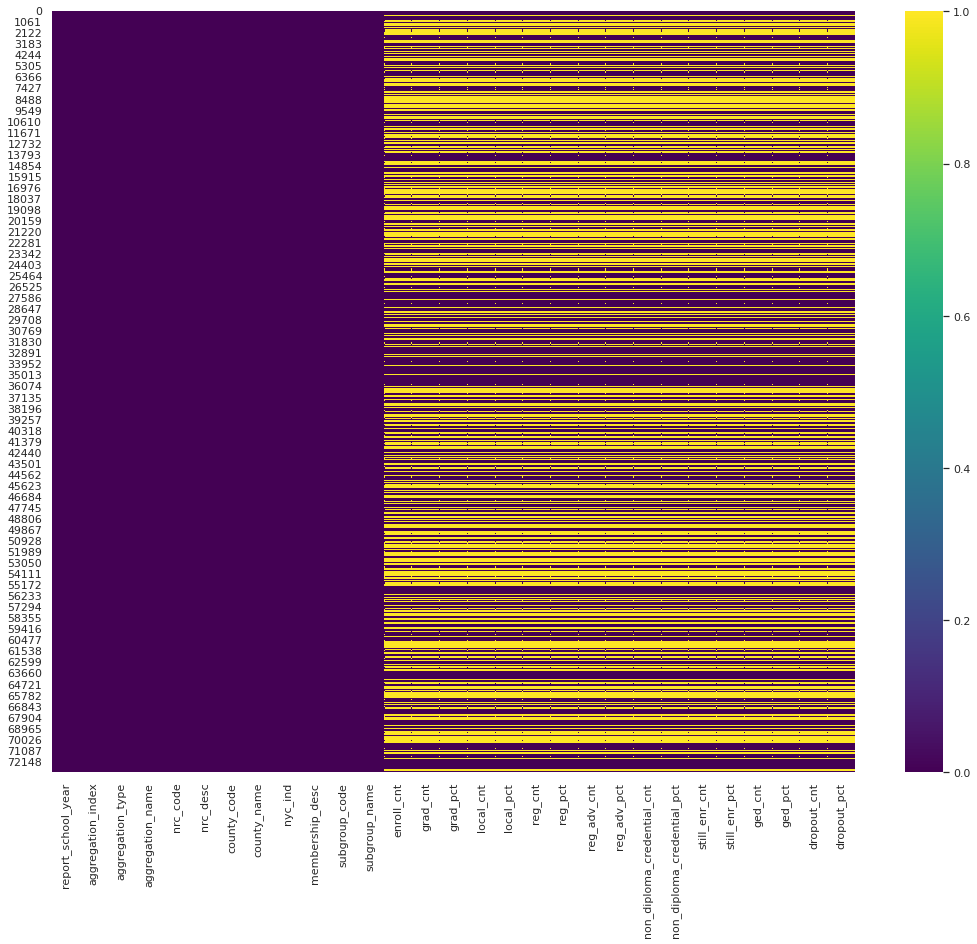

In [ ]:
#null visualization
sns.set(rc={'figure.figsize':(18,14)})
sns.heatmap(df.isnull(), cmap='viridis');

50% of our target variable are missing, which is troubling. The missing data in the cnt/pct features line up with our missing target perfectly. We will have to perform some analyses to see if these missing values are correlated with categorical values. There doesn't seem to be a unique key in the dataset for us to check to see if there are duplicates. We may need to drop all rows with the missing target variable: it is too large of a group to impute.

### Univariate Analysis
Column by Column EDA

#### dropout_cnt (Target)

This represents the number of students from a particular school/subgroup that dropped out. It is our target variable.

Skewness: 7.119012
Kurtosis: 73.834067


count    39674.000000
mean        16.239225
std         50.129834
min          0.000000
25%          1.000000
50%          3.000000
75%          9.000000
max       1091.000000
Name: dropout_cnt, dtype: float64

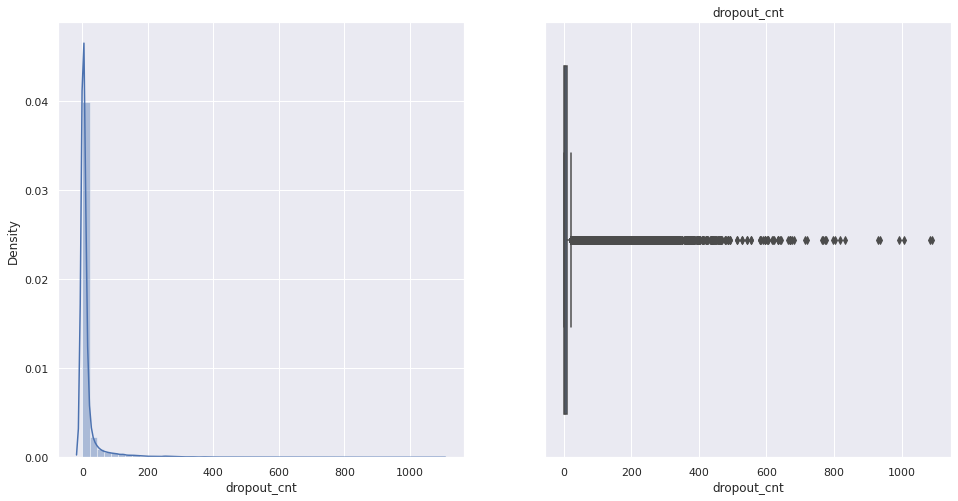

In [ ]:
#Create a histogram and boxplot side by side
i = df.dropout_cnt[df['dropout_cnt'].notnull()] # from jacob - you previously were showing just the mask not the actual values 

sns.set_style();
##plt.hist(i, density=True, stacked =True)
plt.figure(figsize=(16,8)) #sets size of plot
#Histogram
plt.subplot(1,2,1);#sets subplot location left
sns.distplot(i);#calls a histogram
#plt.title('shares')#adds title
#Boxplot
plt.subplot(1,2,2);#sets subplot location right
sns.boxplot(i, );#calls a boxplot
plt.title('dropout_cnt');#adds title

print("Skewness: %f" %i.skew()) #Adds Skew (symmetry) value https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de
#· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
#· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
#· If the skewness is less than -1 or greater than 1, the data are highly skewed
print("Kurtosis: %f" %i.kurt(skipna = True)) #Adds Kurtosis value (tail-ness)
#while kurtosis determines the heaviness of the distribution tails.
#Kurtosis > 3 thin and not spread
# Kurtosis <3 moderate spread
i.describe() #Adds summary statistics of the variable

#### droupout_pct
The percent of the subgroup who drop out.

Skewness: 2.493681
Kurtosis: 9.467020


count    39674.000000
mean         7.963049
std          9.658698
min          0.000000
25%          1.000000
50%          5.000000
75%         11.000000
max        100.000000
Name: dropout_pct, dtype: float64

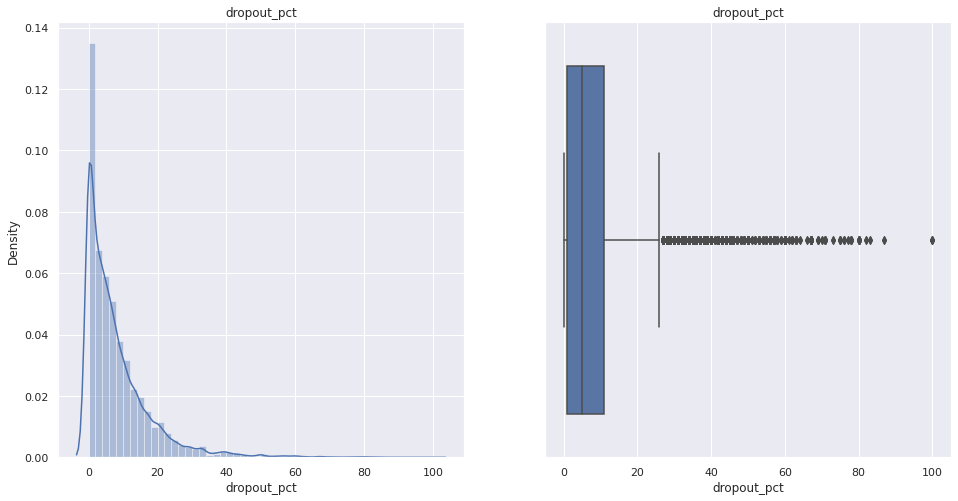

In [ ]:
#Create a histogram and boxplot side by side
i = df.dropout_pct
sns.set_style();
##plt.hist(i, density=True, stacked =True)
plt.figure(figsize=(16,8))#sets size of plot
#Histogram
plt.subplot(1,2,1);#sets subplot location left
sns.distplot(i);#calls a histogram
plt.title('dropout_pct')#adds title
#Boxplot
plt.subplot(1,2,2);#sets subplot location right
sns.boxplot(i, );#calls a boxplot
plt.title('dropout_pct');#adds title

print("Skewness: %f" %i.skew()) #Adds Skew (symmetry) value https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de
#· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
#· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
#· If the skewness is less than -1 or greater than 1, the data are highly skewed
print("Kurtosis: %f" %i.kurt(skipna = True)) #Adds Kurtosis value (tail-ness)
#while kurtosis determines the heaviness of the distribution tails.
#Kurtosis > 3 thin and not spread
# Kurtosis <3 moderate spread
i.describe() 

conclusions: Interesting to compare to other pct features, but we will need to drop to prevent data leak in model predictions.



#### report_school_year

In [ ]:
df.report_school_year.value_counts()

2018-19    73152
Name: report_school_year, dtype: int64

All rows are entries for the same year. This may be useful when performing 


analyses across years, but is not relvant in our context. We will drop this column.

#### aggregation_index

In [ ]:
df.aggregation_index.value_counts()

3    73152
Name: aggregation_index, dtype: int64

All rows are entries for the same aggregation type. This may be useful when performing analyses across datasets, but is not relevant in our context. We will drop this column.
#### aggregation_type

In [ ]:
df.aggregation_type.value_counts()

District    73152
Name: aggregation_type, dtype: int64

All entries have been aggregated by District. This may be useful when performing analyses across datasets, but is not relevant in our context. We will drop this column.


#### aggregation_name

In [ ]:
df.aggregation_name.value_counts()

KINGSTON CITY SCHOOL DISTRICT                           138
WILLIAMSVILLE CENTRAL SCHOOL DISTRICT                   136
RIVERHEAD CENTRAL SCHOOL DISTRICT                       134
ROCHESTER CITY SCHOOL DISTRICT                          134
KENMORE-TONAWANDA UNION FREE SCHOOL DISTRICT            134
                                                       ... 
BERKSHIRE UNION FREE SCHOOL DISTRICT                     70
KIRYAS JOEL VILLAGE UNION FREE SCHOOL DISTRICT           66
GREENBURGH-NORTH CASTLE UNION FREE SCHOOL DISTRICT       56
MOUNT PLEASANT-BLYTHEDALE UNION FREE SCHOOL DISTRICT     48
RANDOLPH ACADEMY UNION FREE SCHOOL DISTRICT              40
Name: aggregation_name, Length: 680, dtype: int64

In [ ]:
len(pd.unique(df['aggregation_name']))

680

This may be a useful categorical feature which identifies the district of each student. The large number of values means that we will have to employ some grouping technique such as hashing.



#### nrc_code/nrc_desc

This is a code and description of the type of school district

In [ ]:
df.nrc_code.value_counts()

5    35322
4    14968
6    13068
3     5228
1     4042
2      524
Name: nrc_code, dtype: int64

We can see there is quite a difference between these types of school districts. We will now match the numeric value to the description of these 'nrc' categories.

In [ ]:
#group all nrc_code values by group, and then assign the appropriate desc for unique values
nrc_group = df.groupby('nrc_code')
nrc = nrc_group.apply(lambda x: x['nrc_desc'].unique())

nrc

nrc_code
1                                      [NYC]
2    [Buffalo  Rochester  Yonkers  Syracuse]
3                [Urban-Suburban High Needs]
4                         [Rural High Needs]
5                            [Average Needs]
6                                [Low Needs]
dtype: object

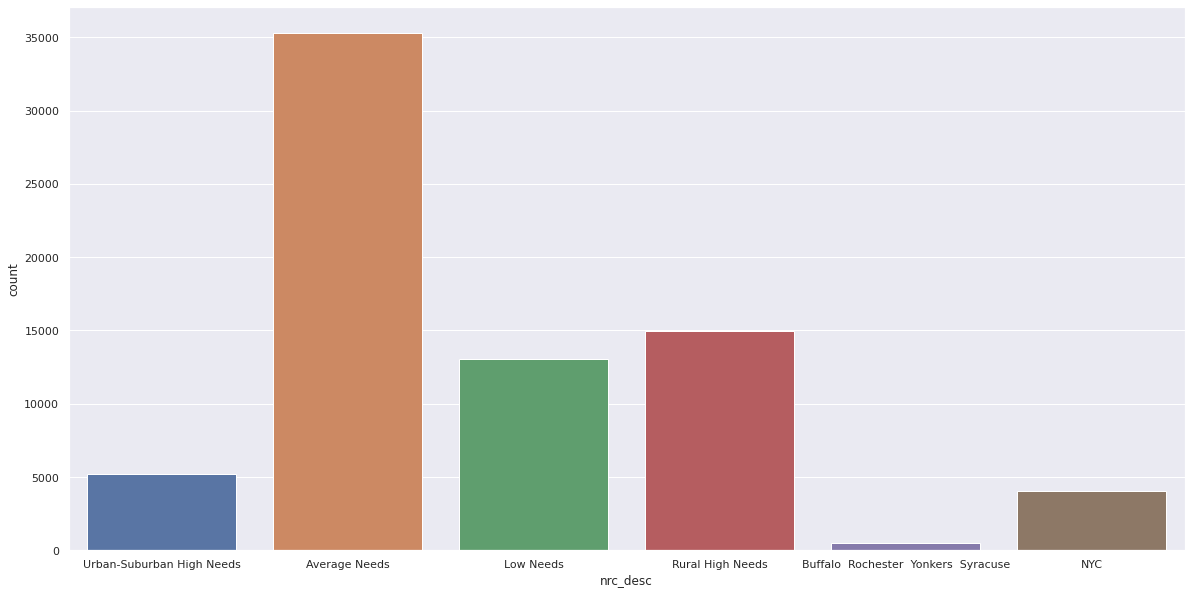

In [ ]:
#visualize groups
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(df.nrc_desc);

The nrc attribute identifies "needs / resource capacity", or the type of school district. The distribution may be something to watch out for in terms of representation in the training/validation split for data models. This feature seems to be partially rank ordered, but not completely. 

**conclusions:**  
drop nrc_code and handle nrc_desc carefully 


#### county_code/county_name

In [ ]:
df.county_code.value_counts()

58    6526
28    5190
66    4834
14    3202
26    2196
      ... 
7      340
20     226
68     212
55     202
35     130
Name: county_code, Length: 62, dtype: int64

In [ ]:
#group all county_code values by group, and then assign the appropriate desc for unique values
county_group = df.groupby('county_code')
county = county_group.apply(lambda x: x['county_name'].unique())

county

county_code
1          [ALBANY]
2        [ALLEGANY]
3          [BROOME]
4     [CATTARAUGUS]
5          [CAYUGA]
          ...      
64     [WASHINGTON]
65          [WAYNE]
66    [WESTCHESTER]
67        [WYOMING]
68          [YATES]
Length: 62, dtype: object

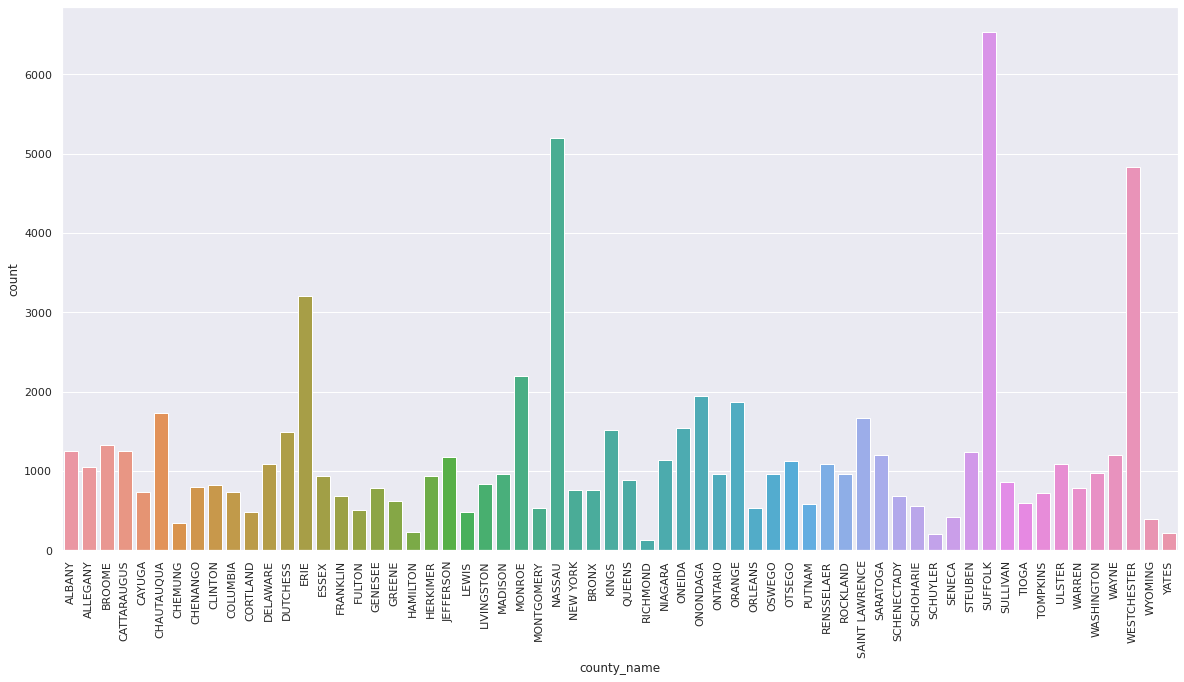

In [ ]:
#visualize groups
sns.set(rc={'figure.figsize':(20,10)})
plt.xticks(rotation=90)
sns.countplot(df.county_name);

We see a wide gap between the number of entries per county
Conclusion: Drop county_code, treat county_name with care

#### nyc_ind

In [ ]:
df.nyc_ind.value_counts()

0    69110
1     4042
Name: nyc_ind, dtype: int64

We expect this feature to be correlated with county_code and nrc_code, but will leave feature selection for a later section.

#### membership_desc

In [ ]:
df.membership_desc.value_counts()

2015 Total Cohort - 4 Year Outcome - August 2019    12299
2015 Total Cohort - 4 Year Outcome                  12299
2014 Total Cohort - 5 Year Outcome                  12257
2014 Total Cohort - 5 Year Outcome - August 2019    12257
2013 Total Cohort - 6 Year Outcome                  12020
2013 Total Cohort - 6 Year Outcome - August 2019    12020
Name: membership_desc, dtype: int64

#### subgroup_code/subgroup_name/enroll_cnt

subgroup: Note that a student may belong to MORE THAN ONE subgrouping (e.g., "Female", "Hispanic", "Not English Language Learner", etc.)

enroll_cnt: How many students of the indicated subgrouping were enrolled during the given school year

In [ ]:
#group all subgroup_code values by group, and then assign the appropriate name for unique values
subgroup_group = df.groupby('subgroup_code')
subgroup = subgroup_group.apply(lambda x: x['subgroup_name'].unique())

subgroup

subgroup_code
1                          [All Students]
2                                [Female]
3                                  [Male]
4         [American Indian/Alaska Native]
5                                 [Black]
6                              [Hispanic]
7                [Asian/Pacific Islander]
8                                 [White]
9                           [Multiracial]
10           [General Education Students]
11           [Students with Disabilities]
12         [Not English Language Learner]
13             [English Language Learner]
14    [Formerly English Language Learner]
15           [Economically Disadvantaged]
16       [Not Economically Disadvantaged]
17                              [Migrant]
18                          [Not Migrant]
20                             [Homeless]
21                         [Not Homeless]
22                       [In Foster Care]
23                   [Not in Foster Care]
24               [Parent in Armed Forces]
25           [Parent

In [ ]:
sg_val = df.subgroup_code.value_counts(sort=False) 
sg_val

1     4074
2     4060
3     4068
4     1312
5     3066
6     3352
7     2752
8     4050
9     2690
10    4056
11    4028
12    4068
13    1824
14    1464
15    4046
16    4028
17     362
18    4074
20    2702
21    4074
22     616
23    4070
24     242
25    4074
Name: subgroup_code, dtype: int64

Conclusion: we have several sparse classes which we may combine. We will drop subgroup_code, a categorical column which is represented by ordinal data at the moment, which we can gather from subgroup_name

#### grad_cnt

How many enrolled students of the indicated subgrouping graduated at the end of the given school year

Skewness: 7.768134
Kurtosis: 97.521516


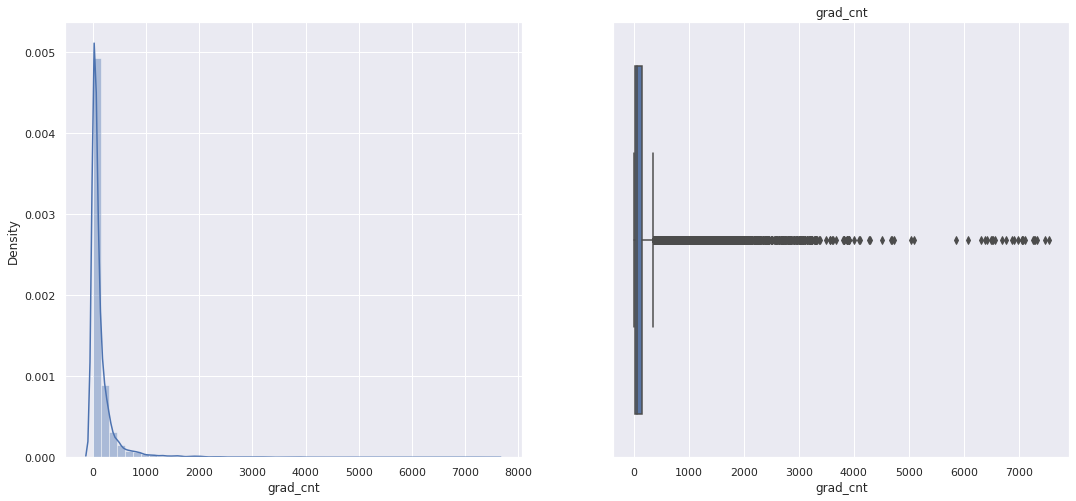

In [ ]:
#Create a histogram and boxplot side by side
i = df.grad_cnt # from jacob - you previously were showing just the mask not the actual values 

sns.set_style();
##plt.hist(i, density=True, stacked =True)
plt.figure(figsize=(18,8))#sets size of plot
#Histogram
plt.subplot(1,2,1);#sets subplot location left
sns.distplot(i);#calls a histogram
#plt.title('shares')#adds title
#Boxplot
plt.subplot(1,2,2);#sets subplot location right
sns.boxplot(i, );#calls a boxplot
plt.title('grad_cnt');#adds title

print("Skewness: %f" %i.skew()) #Adds Skew (symmetry) value https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de
#· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
#· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
#· If the skewness is less than -1 or greater than 1, the data are highly skewed
print("Kurtosis: %f" %i.kurt(skipna = True)) #Adds Kurtosis value (tail-ness)
#while kurtosis determines the heaviness of the distribution tails.
#Kurtosis > 3 thin and not spread
# Kurtosis <3 moderate spread

#### grad_pct
What percentage of enrolled students of the indicated subgrouping graduated at the end for the given school year

Skewness: -1.968723
Kurtosis: 4.956242


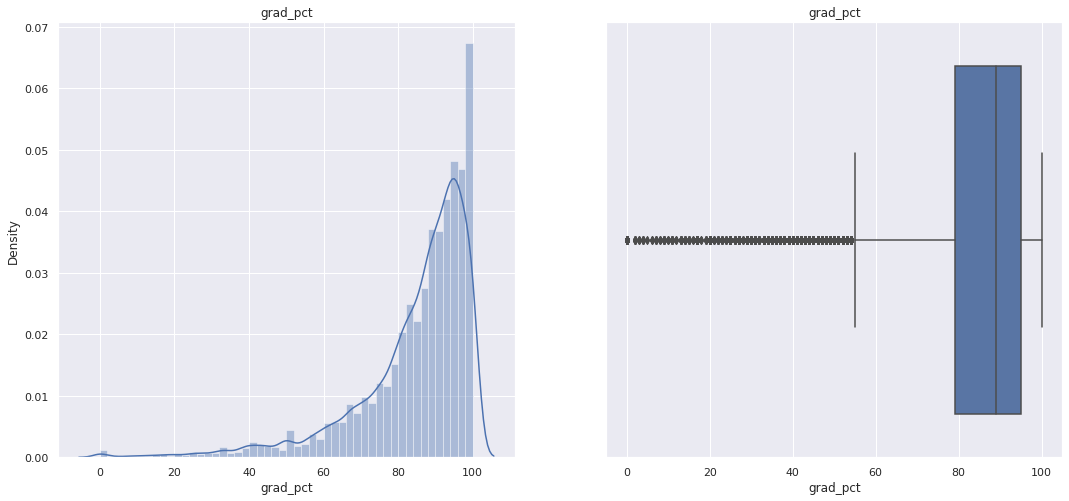

In [ ]:
#Create a histogram and boxplot side by side
i = df.grad_pct

sns.set_style();
##plt.hist(i, density=True, stacked =True)
plt.figure(figsize=(18,8))#sets size of plot
#Histogram
plt.subplot(1,2,1);#sets subplot location left
sns.distplot(i);#calls a histogram
plt.title('grad_pct')#adds title
#Boxplot
plt.subplot(1,2,2);#sets subplot location right
sns.boxplot(i, );#calls a boxplot
plt.title('grad_pct');#adds title

print("Skewness: %f" %i.skew()) #Adds Skew (symmetry) value https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de
#· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
#· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
#· If the skewness is less than -1 or greater than 1, the data are highly skewed
print("Kurtosis: %f" %i.kurt(skipna = True)) #Adds Kurtosis value (tail-ness)
#while kurtosis determines the heaviness of the distribution tails.
#Kurtosis > 3 thin and not spread
# Kurtosis <3 moderate spread

#### local_cnt

Skewness: 6.621719
Kurtosis: 60.720475


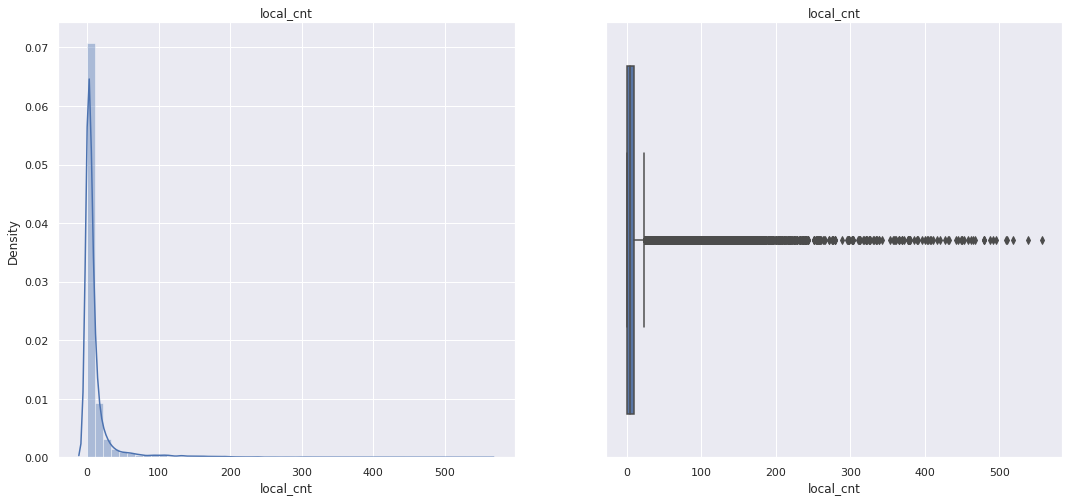

In [ ]:
#Create a histogram and boxplot side by side
i = df.local_cnt 

sns.set_style();
##plt.hist(i, density=True, stacked =True)
plt.figure(figsize=(18,8))#sets size of plot
#Histogram
plt.subplot(1,2,1);#sets subplot location left
sns.distplot(i);#calls a histogram
plt.title('local_cnt')#adds title
#Boxplot
plt.subplot(1,2,2);#sets subplot location right
sns.boxplot(i, );#calls a boxplot
plt.title('local_cnt');#adds title

print("Skewness: %f" %i.skew()) #Adds Skew (symmetry) value https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de
#· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
#· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
#· If the skewness is less than -1 or greater than 1, the data are highly skewed
print("Kurtosis: %f" %i.kurt(skipna = True)) #Adds Kurtosis value (tail-ness)
#while kurtosis determines the heaviness of the distribution tails.
#Kurtosis > 3 thin and not spread
# Kurtosis <3 moderate spread

#### local_pct

Skewness: 2.739318
Kurtosis: 10.641760


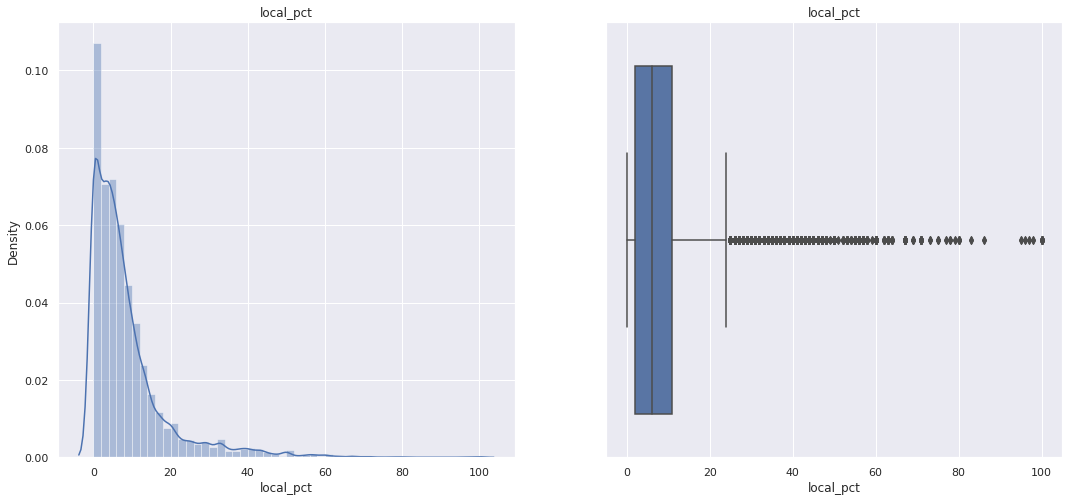

In [ ]:
#Create a histogram and boxplot side by side
i = df.local_pct

sns.set_style();
##plt.hist(i, density=True, stacked =True)
plt.figure(figsize=(18,8))#sets size of plot
#Histogram
plt.subplot(1,2,1);#sets subplot location left
sns.distplot(i);#calls a histogram
plt.title('local_pct')#adds title
#Boxplot
plt.subplot(1,2,2);#sets subplot location right
sns.boxplot(i, );#calls a boxplot
plt.title('local_pct');#adds title

print("Skewness: %f" %i.skew()) #Adds Skew (symmetry) value https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de
#· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
#· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
#· If the skewness is less than -1 or greater than 1, the data are highly skewed
print("Kurtosis: %f" %i.kurt(skipna = True)) #Adds Kurtosis value (tail-ness)
#while kurtosis determines the heaviness of the distribution tails.
#Kurtosis > 3 thin and not spread
# Kurtosis <3 moderate spread

#### reg_cnt

Skewness: 8.059655
Kurtosis: 102.728247


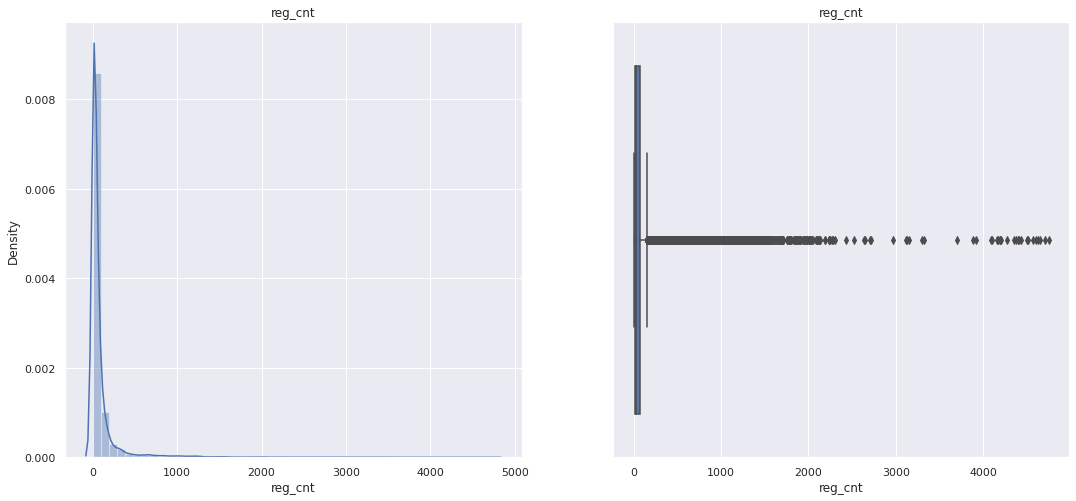

In [ ]:
#Create a histogram and boxplot side by side
i = df.reg_cnt 

sns.set_style();
##plt.hist(i, density=True, stacked =True)
plt.figure(figsize=(18,8))#sets size of plot
#Histogram
plt.subplot(1,2,1);#sets subplot location left
sns.distplot(i);#calls a histogram
plt.title('reg_cnt')#adds title
#Boxplot
plt.subplot(1,2,2);#sets subplot location right
sns.boxplot(i, );#calls a boxplot
plt.title('reg_cnt');#adds title

print("Skewness: %f" %i.skew()) #Adds Skew (symmetry) value https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de
#· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
#· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
#· If the skewness is less than -1 or greater than 1, the data are highly skewed
print("Kurtosis: %f" %i.kurt(skipna = True)) #Adds Kurtosis value (tail-ness)
#while kurtosis determines the heaviness of the distribution tails.
#Kurtosis > 3 thin and not spread
# Kurtosis <3 moderate spread

#### reg_pct

Skewness: 0.326277
Kurtosis: 0.869141


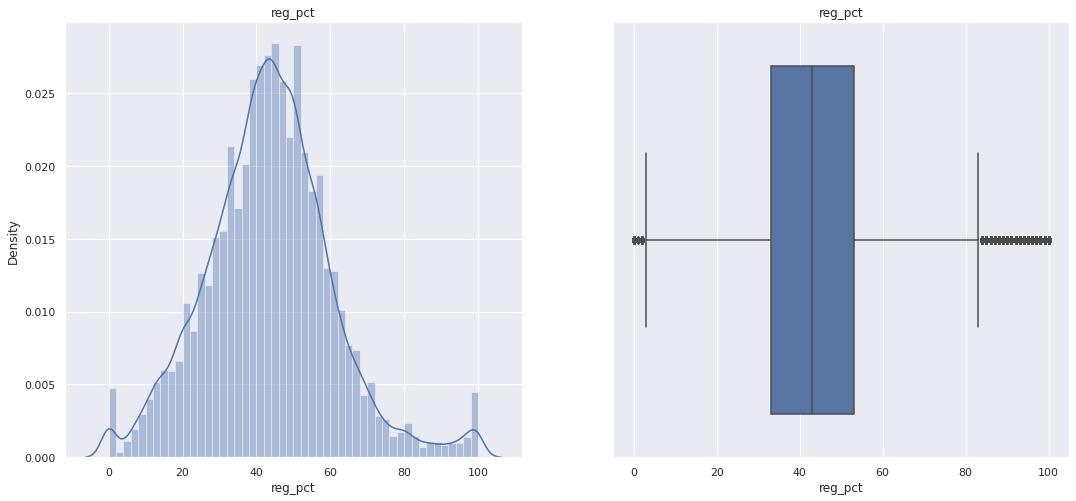

In [ ]:
#Create a histogram and boxplot side by side
i = df.reg_pct

sns.set_style();
##plt.hist(i, density=True, stacked =True)
plt.figure(figsize=(18,8))#sets size of plot
#Histogram
plt.subplot(1,2,1);#sets subplot location left
sns.distplot(i);#calls a histogram
plt.title('reg_pct')#adds title
#Boxplot
plt.subplot(1,2,2);#sets subplot location right
sns.boxplot(i, );#calls a boxplot
plt.title('reg_pct');#adds title

print("Skewness: %f" %i.skew()) #Adds Skew (symmetry) value https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de
# If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
# If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
# If the skewness is less than -1 or greater than 1, the data are highly skewed
print("Kurtosis: %f" %i.kurt(skipna = True)) #Adds Kurtosis value (tail-ness)
#while kurtosis determines the heaviness of the distribution tails.
# Kurtosis > 3 thin and not spread
# Kurtosis <3 moderate spread

#### reg_adv_cnt

Skewness: 6.255797
Kurtosis: 60.643494


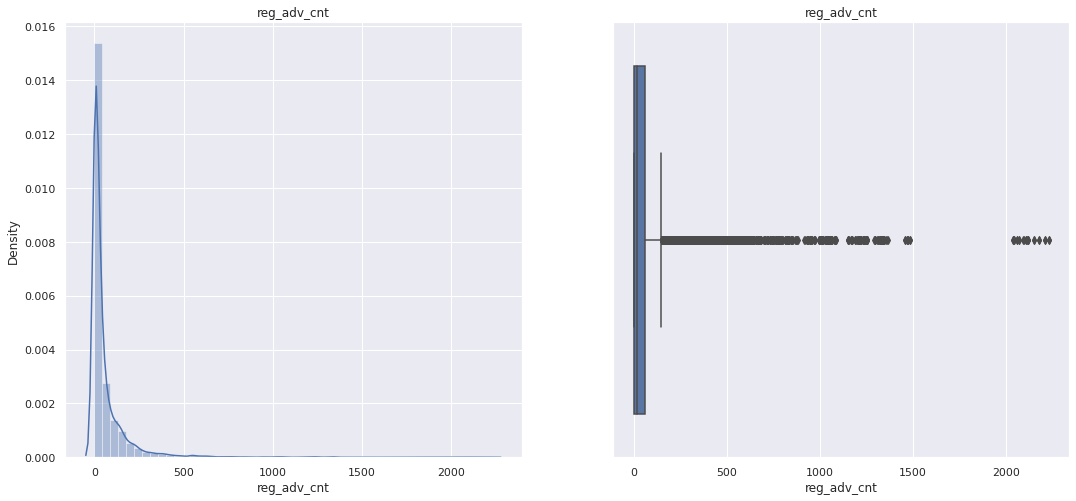

In [ ]:
#Create a histogram and boxplot side by side
i = df.reg_adv_cnt

sns.set_style();
##plt.hist(i, density=True, stacked =True)
plt.figure(figsize=(18,8))#sets size of plot
#Histogram
plt.subplot(1,2,1);#sets subplot location left
sns.distplot(i);#calls a histogram
plt.title('reg_adv_cnt')#adds title
#Boxplot
plt.subplot(1,2,2);#sets subplot location right
sns.boxplot(i, );#calls a boxplot
plt.title('reg_adv_cnt');#adds title

print("Skewness: %f" %i.skew()) #Adds Skew (symmetry) value https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de
#· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
#· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
#· If the skewness is less than -1 or greater than 1, the data are highly skewed
print("Kurtosis: %f" %i.kurt(skipna = True)) #Adds Kurtosis value (tail-ness)
#while kurtosis determines the heaviness of the distribution tails.
#Kurtosis > 3 thin and not spread
# Kurtosis <3 moderate spread

#### reg_adv_pct

Skewness: 0.333009
Kurtosis: -0.682708


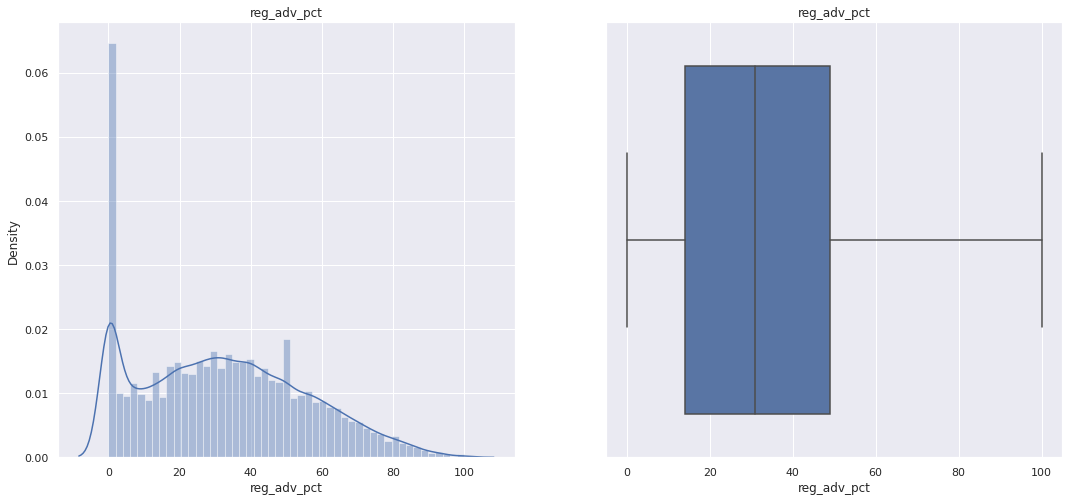

In [ ]:
#Create a histogram and boxplot side by side
i = df.reg_adv_pct

sns.set_style();
##plt.hist(i, density=True, stacked =True)
plt.figure(figsize=(18,8))#sets size of plot
#Histogram
plt.subplot(1,2,1);#sets subplot location left
sns.distplot(i);#calls a histogram
plt.title('reg_adv_pct')#adds title
#Boxplot
plt.subplot(1,2,2);#sets subplot location right
sns.boxplot(i, );#calls a boxplot
plt.title('reg_adv_pct');#adds title

print("Skewness: %f" %i.skew()) #Adds Skew (symmetry) value https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de
#· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
#· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
#· If the skewness is less than -1 or greater than 1, the data are highly skewed
print("Kurtosis: %f" %i.kurt(skipna = True)) #Adds Kurtosis value (tail-ness)
#while kurtosis determines the heaviness of the distribution tails.
#Kurtosis > 3 thin and not spread
# Kurtosis <3 moderate spread

#### non_diploma_credential_cnt

Skewness: 17.986157
Kurtosis: 582.359345


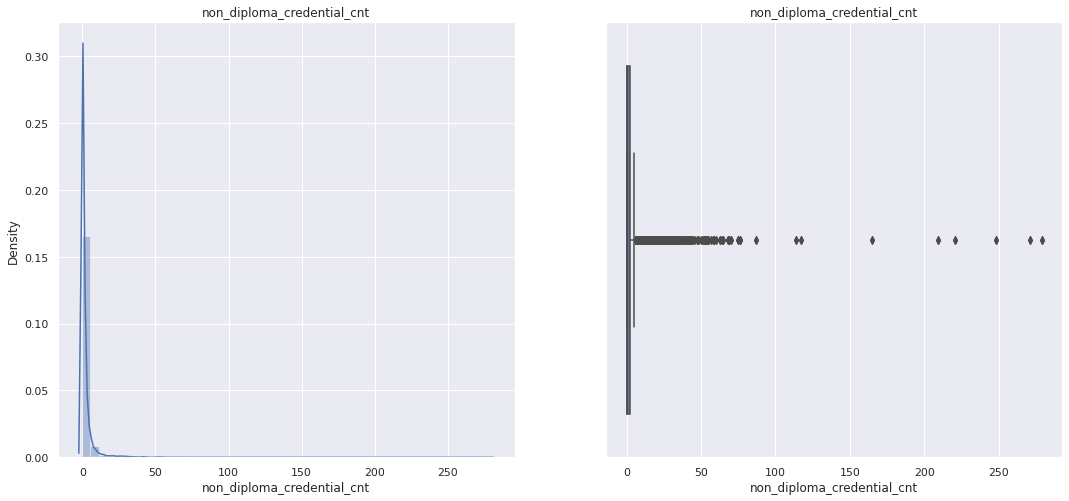

In [ ]:
#Create a histogram and boxplot side by side
i = df.non_diploma_credential_cnt 

sns.set_style();
##plt.hist(i, density=True, stacked =True)
plt.figure(figsize=(18,8))#sets size of plot
#Histogram
plt.subplot(1,2,1);#sets subplot location left
sns.distplot(i);#calls a histogram
plt.title('non_diploma_credential_cnt')#adds title
#Boxplot
plt.subplot(1,2,2);#sets subplot location right
sns.boxplot(i, );#calls a boxplot
plt.title('non_diploma_credential_cnt');#adds title

print("Skewness: %f" %i.skew()) #Adds Skew (symmetry) value https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de
#· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
#· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
#· If the skewness is less than -1 or greater than 1, the data are highly skewed
print("Kurtosis: %f" %i.kurt(skipna = True)) #Adds Kurtosis value (tail-ness)
#while kurtosis determines the heaviness of the distribution tails.
#Kurtosis > 3 thin and not spread
# Kurtosis <3 moderate spread

#### non_diploma_credential_pct

Skewness: 4.939532
Kurtosis: 35.948066


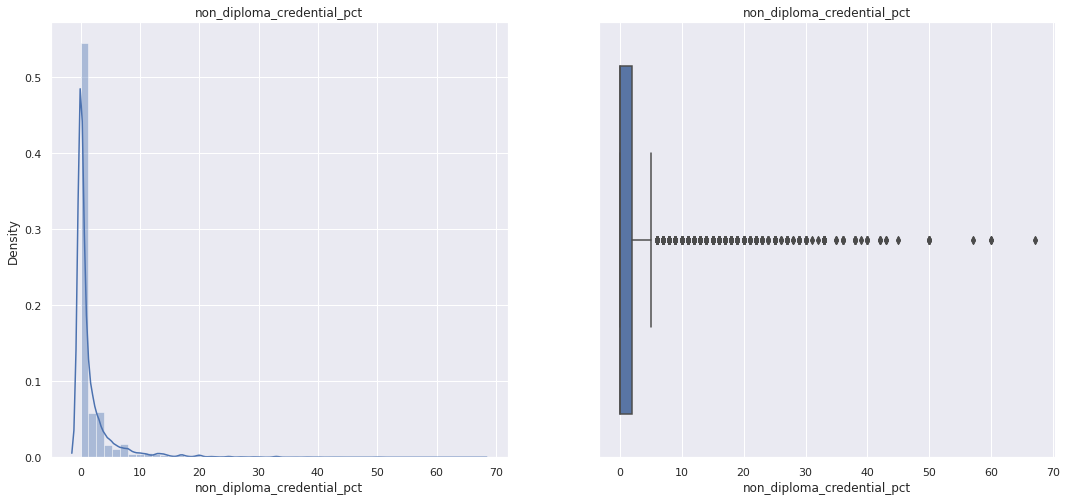

In [ ]:
#Create a histogram and boxplot side by side
i = df.non_diploma_credential_pct 

sns.set_style();
##plt.hist(i, density=True, stacked =True)
plt.figure(figsize=(18,8))#sets size of plot
#Histogram
plt.subplot(1,2,1);#sets subplot location left
sns.distplot(i);#calls a histogram
plt.title('non_diploma_credential_pct')#adds title
#Boxplot
plt.subplot(1,2,2);#sets subplot location right
sns.boxplot(i, );#calls a boxplot
plt.title('non_diploma_credential_pct');#adds title

print("Skewness: %f" %i.skew()) #Adds Skew (symmetry) value https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de
#· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
#· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
#· If the skewness is less than -1 or greater than 1, the data are highly skewed
print("Kurtosis: %f" %i.kurt(skipna = True)) #Adds Kurtosis value (tail-ness)
#while kurtosis determines the heaviness of the distribution tails.
#Kurtosis > 3 thin and not spread
# Kurtosis <3 moderate spread

#### still_enr_cnt

Skewness: 10.042656
Kurtosis: 169.593577


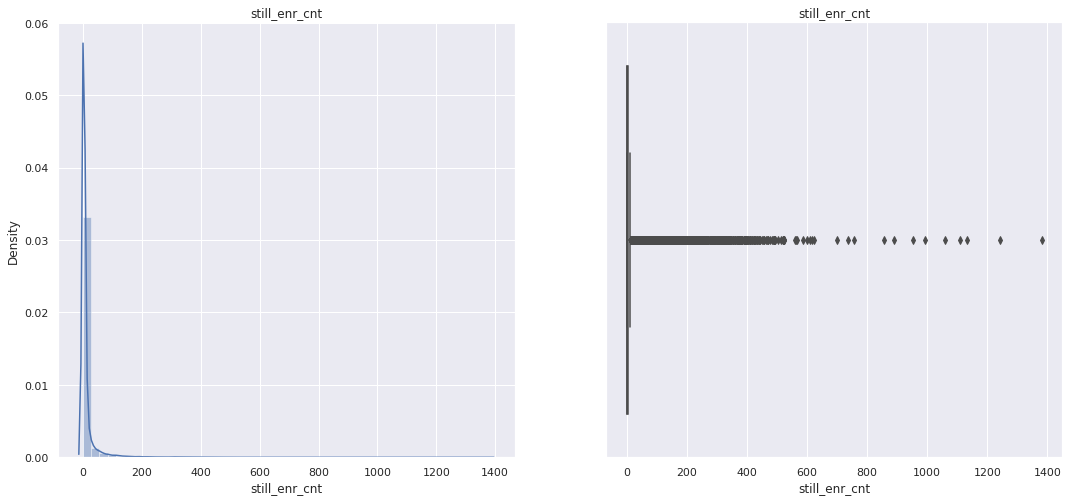

In [ ]:
#Create a histogram and boxplot side by side
i = df.still_enr_cnt

sns.set_style();
##plt.hist(i, density=True, stacked =True)
plt.figure(figsize=(18,8))#sets size of plot
#Histogram
plt.subplot(1,2,1);#sets subplot location left
sns.distplot(i);#calls a histogram
plt.title('still_enr_cnt')#adds title
#Boxplot
plt.subplot(1,2,2);#sets subplot location right
sns.boxplot(i, );#calls a boxplot
plt.title('still_enr_cnt');#adds title

print("Skewness: %f" %i.skew()) #Adds Skew (symmetry) value https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de
#· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
#· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
#· If the skewness is less than -1 or greater than 1, the data are highly skewed
print("Kurtosis: %f" %i.kurt(skipna = True)) #Adds Kurtosis value (tail-ness)
#while kurtosis determines the heaviness of the distribution tails.
#Kurtosis > 3 thin and not spread
# Kurtosis <3 moderate spread

#### still_enr_pct

Skewness: 4.453085
Kurtosis: 31.428664


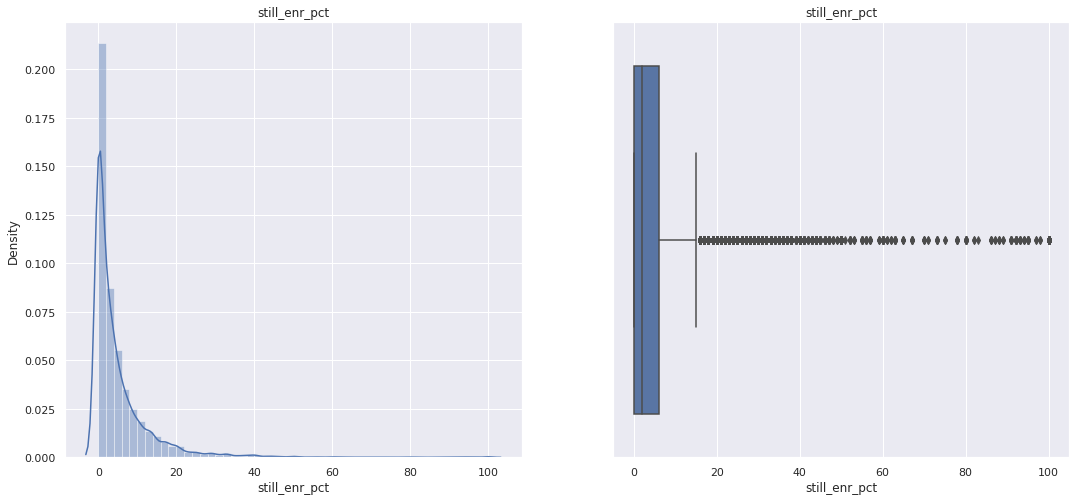

In [ ]:
#Create a histogram and boxplot side by side
i = df.still_enr_pct 

sns.set_style();
##plt.hist(i, density=True, stacked =True)
plt.figure(figsize=(18,8))#sets size of plot
#Histogram
plt.subplot(1,2,1);#sets subplot location left
sns.distplot(i);#calls a histogram
plt.title('still_enr_pct')#adds title
#Boxplot
plt.subplot(1,2,2);#sets subplot location right
sns.boxplot(i, );#calls a boxplot
plt.title('still_enr_pct');#adds title

print("Skewness: %f" %i.skew()) #Adds Skew (symmetry) value https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de
#· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
#· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
#· If the skewness is less than -1 or greater than 1, the data are highly skewed
print("Kurtosis: %f" %i.kurt(skipna = True)) #Adds Kurtosis value (tail-ness)
#while kurtosis determines the heaviness of the distribution tails.
#Kurtosis > 3 thin and not spread
# Kurtosis <3 moderate spread

#### ged_cnt

Skewness: 7.733184
Kurtosis: 83.963713


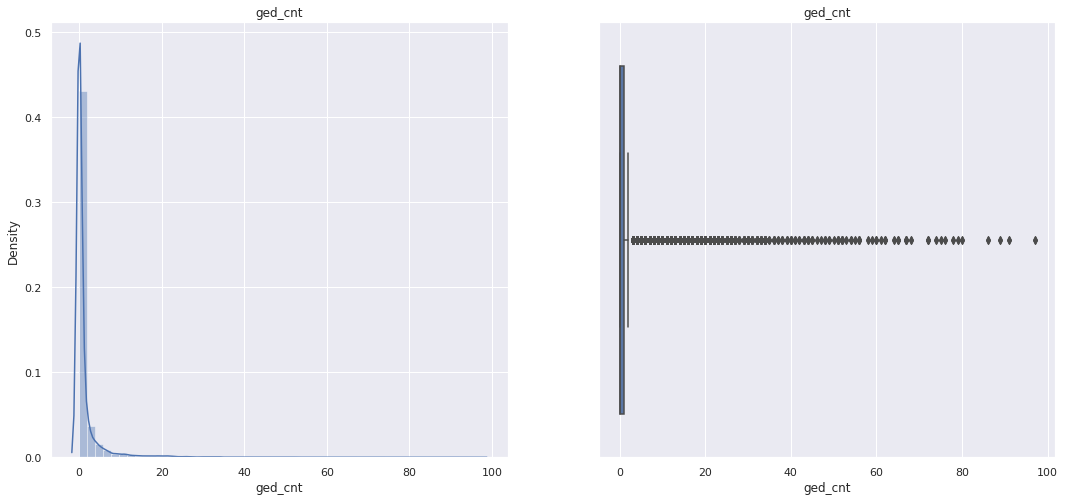

In [ ]:
#Create a histogram and boxplot side by side
i = df.ged_cnt 

sns.set_style();
##plt.hist(i, density=True, stacked =True)
plt.figure(figsize=(18,8))#sets size of plot
#Histogram
plt.subplot(1,2,1);#sets subplot location left
sns.distplot(i);#calls a histogram
plt.title('ged_cnt')#adds title
#Boxplot
plt.subplot(1,2,2);#sets subplot location right
sns.boxplot(i, );#calls a boxplot
plt.title('ged_cnt');#adds title

print("Skewness: %f" %i.skew()) #Adds Skew (symmetry) value https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de
#· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
#· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
#· If the skewness is less than -1 or greater than 1, the data are highly skewed
print("Kurtosis: %f" %i.kurt(skipna = True)) #Adds Kurtosis value (tail-ness)
#while kurtosis determines the heaviness of the distribution tails.
#Kurtosis > 3 thin and not spread
# Kurtosis <3 moderate spread

#### ged_pct

Skewness: 9.425612
Kurtosis: 171.746167


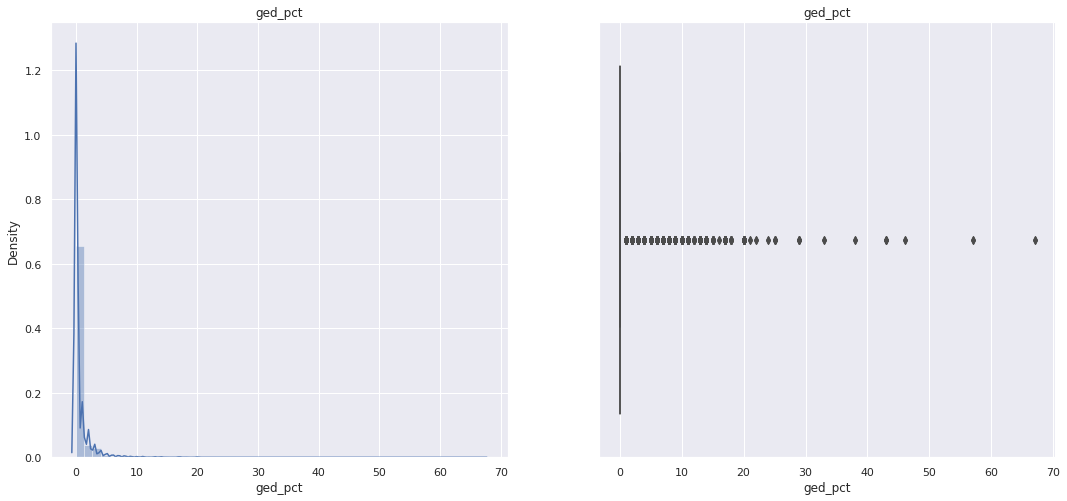

In [ ]:
#Create a histogram and boxplot side by side
i = df.ged_pct

sns.set_style();
##plt.hist(i, density=True, stacked =True)
plt.figure(figsize=(18,8))#sets size of plot
#Histogram
plt.subplot(1,2,1);#sets subplot location left
sns.distplot(i);#calls a histogram
plt.title('ged_pct')#adds title
#Boxplot
plt.subplot(1,2,2);#sets subplot location right
sns.boxplot(i, );#calls a boxplot
plt.title('ged_pct');#adds title

print("Skewness: %f" %i.skew()) #Adds Skew (symmetry) value https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de
#· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
#· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
#· If the skewness is less than -1 or greater than 1, the data are highly skewed
print("Kurtosis: %f" %i.kurt(skipna = True)) #Adds Kurtosis value (tail-ness)
#while kurtosis determines the heaviness of the distribution tails.
#Kurtosis > 3 thin and not spread
# Kurtosis <3 moderate spread

### Multivariate Analysis

#### Groups represented data

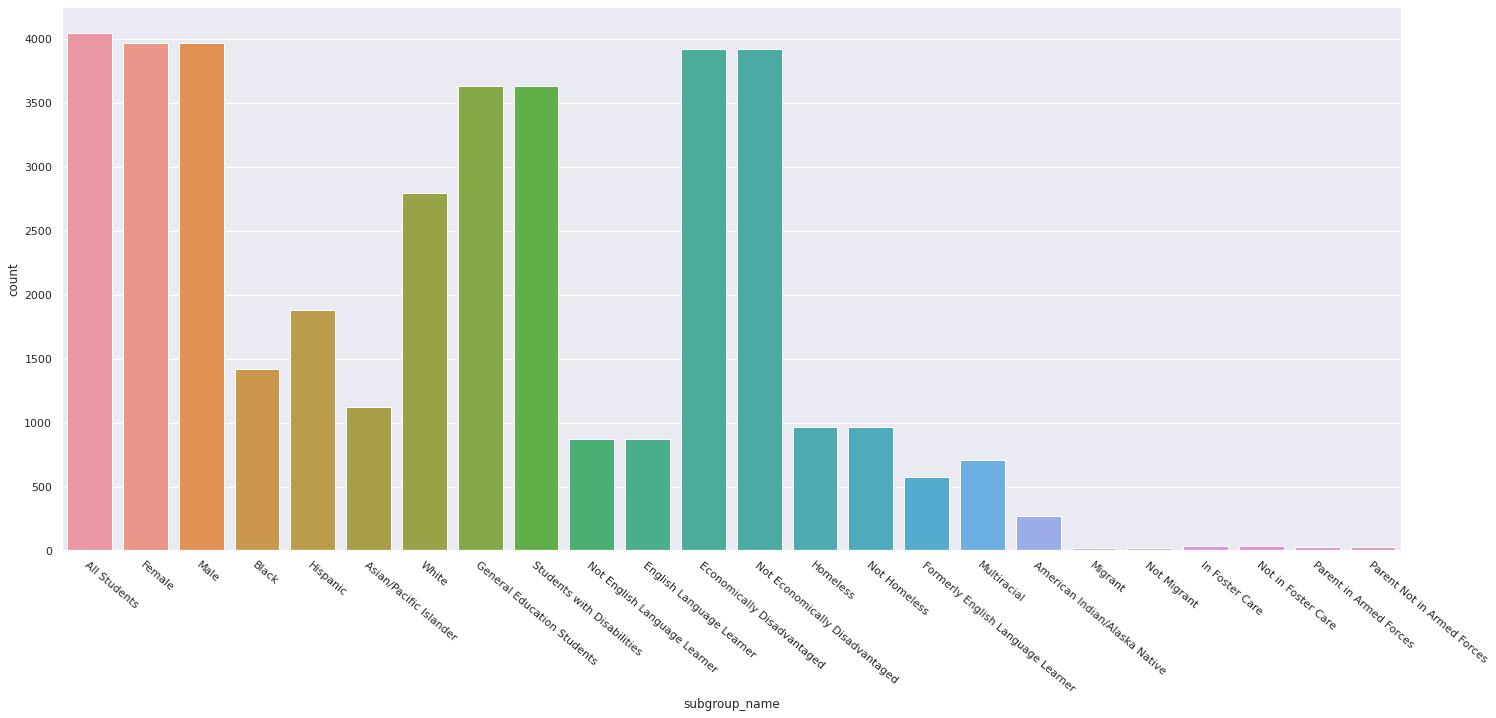

In [ ]:
#how many times does the subgroup show up in the datset. lower values = places without students in the category
subgroup_names = df.dropna().subgroup_name
#subgroup_names_counts.index

sns.set(rc={'figure.figsize':(24,10)})
sns.countplot(subgroup_names)
plt.xticks(rotation=-40 , rotation_mode='anchor',ha="left");

conclusions: 
when we drop out null columns we have several classes that are signifigantly sparser than others we will combine:   
[Migrant, Not migrant, Foster Care, not in foster care, parent in armed forces, parent not in armed forces]

#### dropout by subgroup


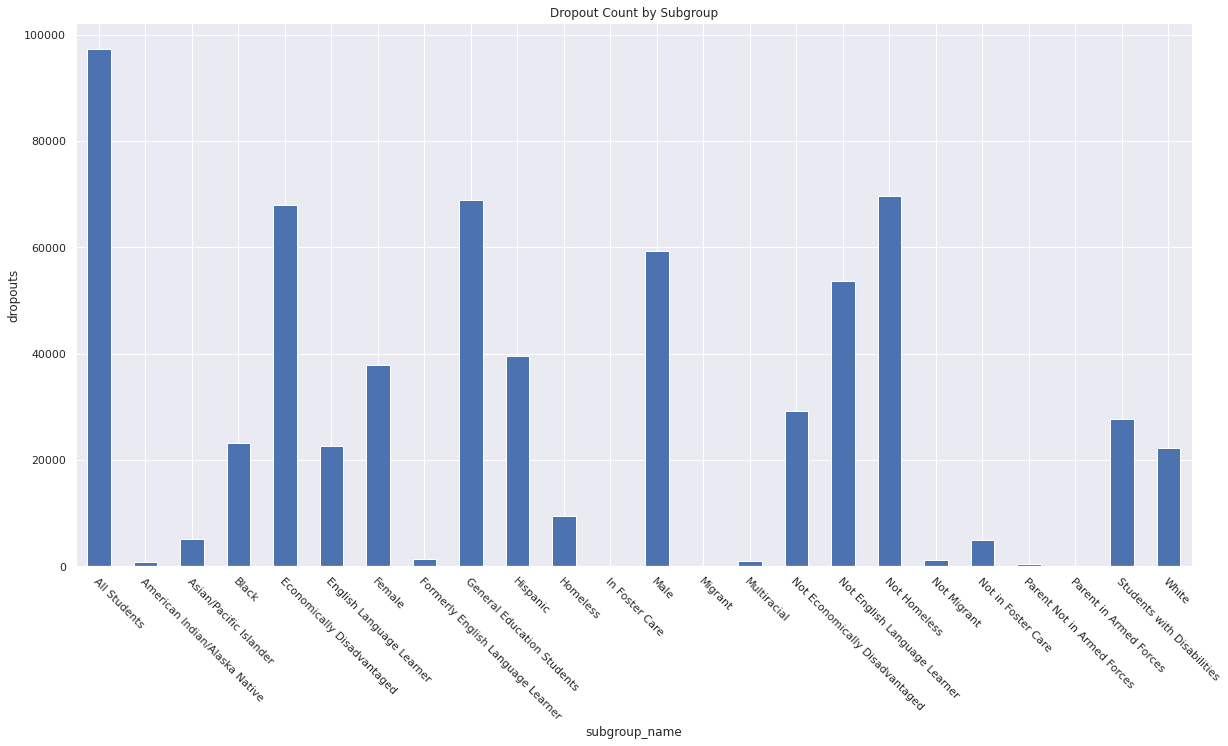

In [ ]:
sds = df.groupby(['subgroup_name'])['dropout_cnt'].agg('sum')
sds.plot(kind='bar', title='Dropout Count by Subgroup', ylabel= 'dropouts', figsize=(20,10),);
plt.xticks(rotation=315 , rotation_mode='anchor',ha="left");

#### dropout by county

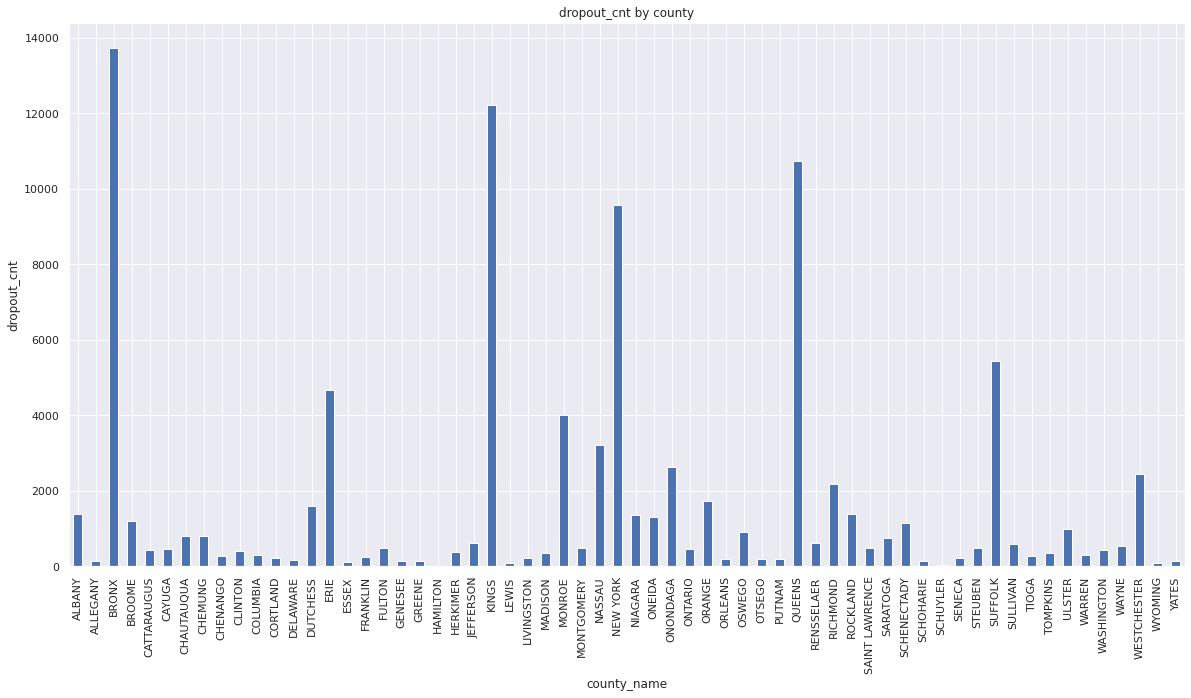

In [ ]:
cds = df[df.subgroup_code <= 1].groupby(df['county_name'])['dropout_cnt'].agg('sum')
cds.plot(kind='bar', title='dropout_cnt by county', ylabel='dropout_cnt', figsize=(20,10));

#### Correlation Analysis

Analyses non-categorical collinearity

#### cnt data

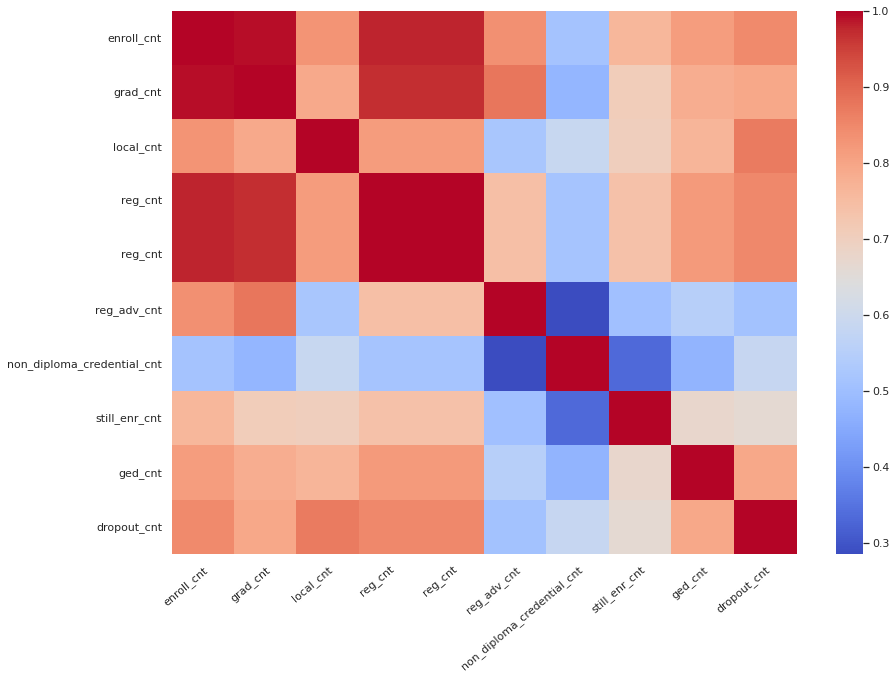

In [ ]:
dfn = df[['enroll_cnt','grad_cnt','local_cnt','reg_cnt','reg_cnt','reg_adv_cnt','non_diploma_credential_cnt','still_enr_cnt',
          'ged_cnt','dropout_cnt']]

plt.figure(figsize=(14,10))
sns.heatmap(dfn.corr(),cmap='coolwarm',annot=False);
plt.xticks(rotation=40 , rotation_mode='anchor',ha="right");

#### pct data

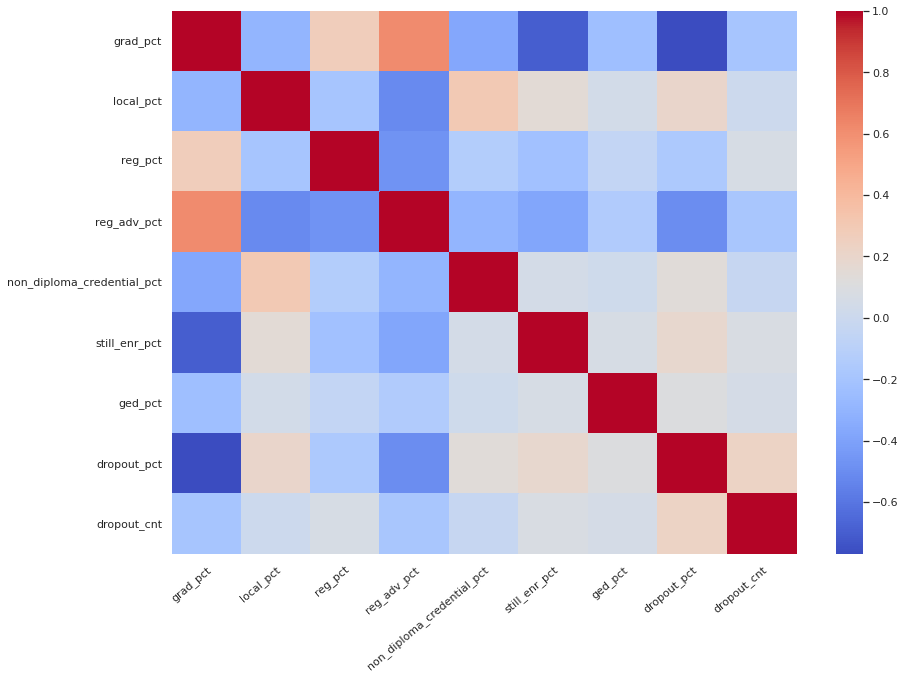

In [ ]:
dfn = df[pct_columns+['dropout_cnt']]

plt.figure(figsize=(14,10))
sns.heatmap(dfn.corr(),cmap='coolwarm',annot=False);
plt.xticks(rotation=40 , rotation_mode='anchor',ha="right");

# Data Preparation

#### dropping columns and rows 

In [ ]:
#drop columns identified in EDA
data_prep = df.drop(['report_school_year','aggregation_type','aggregation_index','subgroup_code', 'nrc_code', 'county_code','subgroup_code','dropout_pct'], axis = 1)

# dropping rows where target is null
#data_prep.dropna(subset=['dropout_cnt'], inplace=True)

#sanity check
data_prep.shape

(73152, 22)

In [ ]:
#sanity check
data_prep.head()

,aggregation_name,nrc_desc,county_name,nyc_ind,membership_desc,subgroup_name,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt
0,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,All Students,658.0,464.0,71.0,63.0,10.0,310.0,47.0,91.0,14.0,16.0,2.0,30.0,5.0,0.0,0.0,148.0
1,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Female,324.0,246.0,76.0,30.0,9.0,169.0,52.0,47.0,15.0,2.0,1.0,11.0,3.0,0.0,0.0,65.0
2,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Male,334.0,218.0,65.0,33.0,10.0,141.0,42.0,44.0,13.0,14.0,4.0,19.0,6.0,0.0,0.0,83.0
3,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,American Indian/Alaska Native,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Black,367.0,248.0,68.0,42.0,11.0,183.0,50.0,23.0,6.0,10.0,3.0,18.0,5.0,0.0,0.0,91.0


#### Sparse Classes
We will now mutate our categorical variables to handle sparse classes 

##### aggregation_name

The first approach we will try will be feature hashing to squash cardinality. We choose 100 columns to reduce the chance of collisions while still reducing cardinality from traditional 1-hot encoding.

In [ ]:
from sklearn.feature_extraction import FeatureHasher
num = 100 

aggregation_name = data_prep['aggregation_name']
hasher = FeatureHasher(n_features=num, input_type ='string') 
aggregation_name_hashed = hasher.fit_transform(aggregation_name)
column_names = [f'agg_hash_{x}'for x in range(num)]

aggregation_name_hashed_frame = pd.DataFrame(aggregation_name_hashed.todense(),columns=column_names)

print(aggregation_name_hashed_frame.shape)
aggregation_name_hashed_frame.head()

(73152, 100)


,agg_hash_0,agg_hash_1,agg_hash_2,agg_hash_3,agg_hash_4,agg_hash_5,agg_hash_6,agg_hash_7,agg_hash_8,agg_hash_9,agg_hash_10,agg_hash_11,agg_hash_12,agg_hash_13,agg_hash_14,agg_hash_15,agg_hash_16,agg_hash_17,agg_hash_18,agg_hash_19,agg_hash_20,agg_hash_21,agg_hash_22,agg_hash_23,agg_hash_24,agg_hash_25,agg_hash_26,agg_hash_27,agg_hash_28,agg_hash_29,agg_hash_30,agg_hash_31,agg_hash_32,agg_hash_33,agg_hash_34,agg_hash_35,agg_hash_36,agg_hash_37,agg_hash_38,agg_hash_39,agg_hash_40,agg_hash_41,agg_hash_42,agg_hash_43,agg_hash_44,agg_hash_45,agg_hash_46,agg_hash_47,agg_hash_48,agg_hash_49,agg_hash_50,agg_hash_51,agg_hash_52,agg_hash_53,agg_hash_54,agg_hash_55,agg_hash_56,agg_hash_57,agg_hash_58,agg_hash_59,agg_hash_60,agg_hash_61,agg_hash_62,agg_hash_63,agg_hash_64,agg_hash_65,agg_hash_66,agg_hash_67,agg_hash_68,agg_hash_69,agg_hash_70,agg_hash_71,agg_hash_72,agg_hash_73,agg_hash_74,agg_hash_75,agg_hash_76,agg_hash_77,agg_hash_78,agg_hash_79,agg_hash_80,agg_hash_81,agg_hash_82,agg_hash_83,agg_hash_84,agg_hash_85,agg_hash_86,agg_hash_87,agg_hash_88,agg_hash_89,agg_hash_90,agg_hash_91,agg_hash_92,agg_hash_93,agg_hash_94,agg_hash_95,agg_hash_96,agg_hash_97,agg_hash_98,agg_hash_99
0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.0,-1.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.0,-1.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.0,-1.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.0,-1.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.0,-1.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We have condensed the aggregation names into a 100 column space, a huge decrease from what we would have by utilizing 1 hot encoding. It is no longer human readable, but we believe the tradeoff worthwhile to leverage in feature selection for the model. We will now replace the column in our dataframe with the hashed dataframe.


In [ ]:
#replace aggregation name with hashed columns
data_prep.drop(['aggregation_name'], axis=1, inplace=True)
data_prep = pd.concat([data_prep, aggregation_name_hashed_frame], axis=1 )
data_prep.dropna(subset=['dropout_cnt'], inplace=True)#droping target here instead of earlier to prevent problems with concat function
del aggregation_name_hashed_frame
data_prep.head()

,nrc_desc,county_name,nyc_ind,membership_desc,subgroup_name,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,agg_hash_0,agg_hash_1,agg_hash_2,agg_hash_3,agg_hash_4,agg_hash_5,agg_hash_6,agg_hash_7,agg_hash_8,agg_hash_9,agg_hash_10,agg_hash_11,agg_hash_12,agg_hash_13,agg_hash_14,agg_hash_15,agg_hash_16,agg_hash_17,agg_hash_18,agg_hash_19,agg_hash_20,agg_hash_21,agg_hash_22,agg_hash_23,agg_hash_24,agg_hash_25,agg_hash_26,agg_hash_27,agg_hash_28,agg_hash_29,agg_hash_30,agg_hash_31,agg_hash_32,agg_hash_33,agg_hash_34,agg_hash_35,agg_hash_36,agg_hash_37,agg_hash_38,agg_hash_39,agg_hash_40,agg_hash_41,agg_hash_42,agg_hash_43,agg_hash_44,agg_hash_45,agg_hash_46,agg_hash_47,agg_hash_48,agg_hash_49,agg_hash_50,agg_hash_51,agg_hash_52,agg_hash_53,agg_hash_54,agg_hash_55,agg_hash_56,agg_hash_57,agg_hash_58,agg_hash_59,agg_hash_60,agg_hash_61,agg_hash_62,agg_hash_63,agg_hash_64,agg_hash_65,agg_hash_66,agg_hash_67,agg_hash_68,agg_hash_69,agg_hash_70,agg_hash_71,agg_hash_72,agg_hash_73,agg_hash_74,agg_hash_75,agg_hash_76,agg_hash_77,agg_hash_78,agg_hash_79,agg_hash_80,agg_hash_81,agg_hash_82,agg_hash_83,agg_hash_84,agg_hash_85,agg_hash_86,agg_hash_87,agg_hash_88,agg_hash_89,agg_hash_90,agg_hash_91,agg_hash_92,agg_hash_93,agg_hash_94,agg_hash_95,agg_hash_96,agg_hash_97,agg_hash_98,agg_hash_99
0,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,All Students,658.0,464.0,71.0,63.0,10.0,310.0,47.0,91.0,14.0,16.0,2.0,30.0,5.0,0.0,0.0,148.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.0,-1.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Female,324.0,246.0,76.0,30.0,9.0,169.0,52.0,47.0,15.0,2.0,1.0,11.0,3.0,0.0,0.0,65.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.0,-1.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Male,334.0,218.0,65.0,33.0,10.0,141.0,42.0,44.0,13.0,14.0,4.0,19.0,6.0,0.0,0.0,83.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.0,-1.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Black,367.0,248.0,68.0,42.0,11.0,183.0,50.0,23.0,6.0,10.0,3.0,18.0,5.0,0.0,0.0,91.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.0,-1.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Hispanic,98.0,58.0,59.0,13.0,13.0,40.0,41.0,5.0,5.0,4.0,4.0,8.0,8.0,0.0,0.0,28.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,

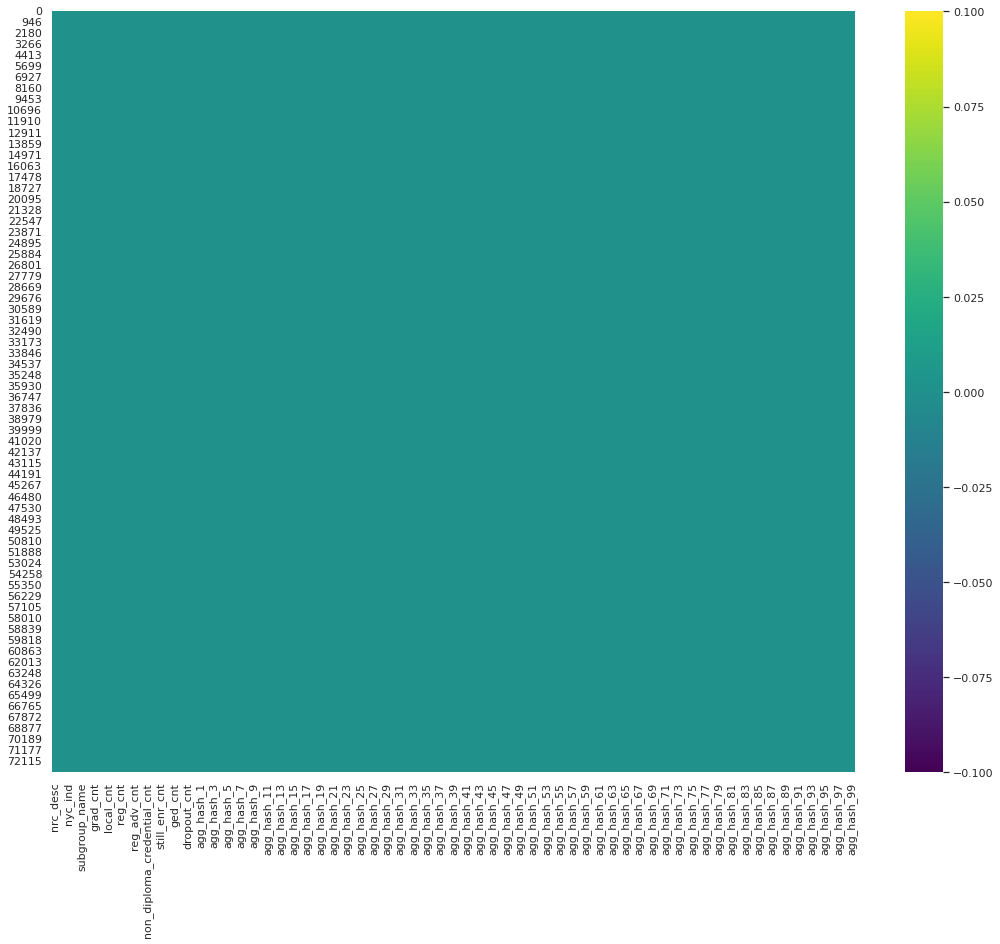

In [ ]:
#null visualization
sns.set(rc={'figure.figsize':(18,14)})
sns.heatmap(data_prep.isnull(), cmap='viridis');

##### county_name
There are fewer values for county name, so we will explore a simpler sparse class combination
`sum(countyname.value_counts(normalize=True)< .01)` = 19   
their are 19 category names that represent less than 1 percent of our data. We will combine them.

code referenced: https://www.codegrepper.com/code-examples/python/combining+sparse+class

(36,)


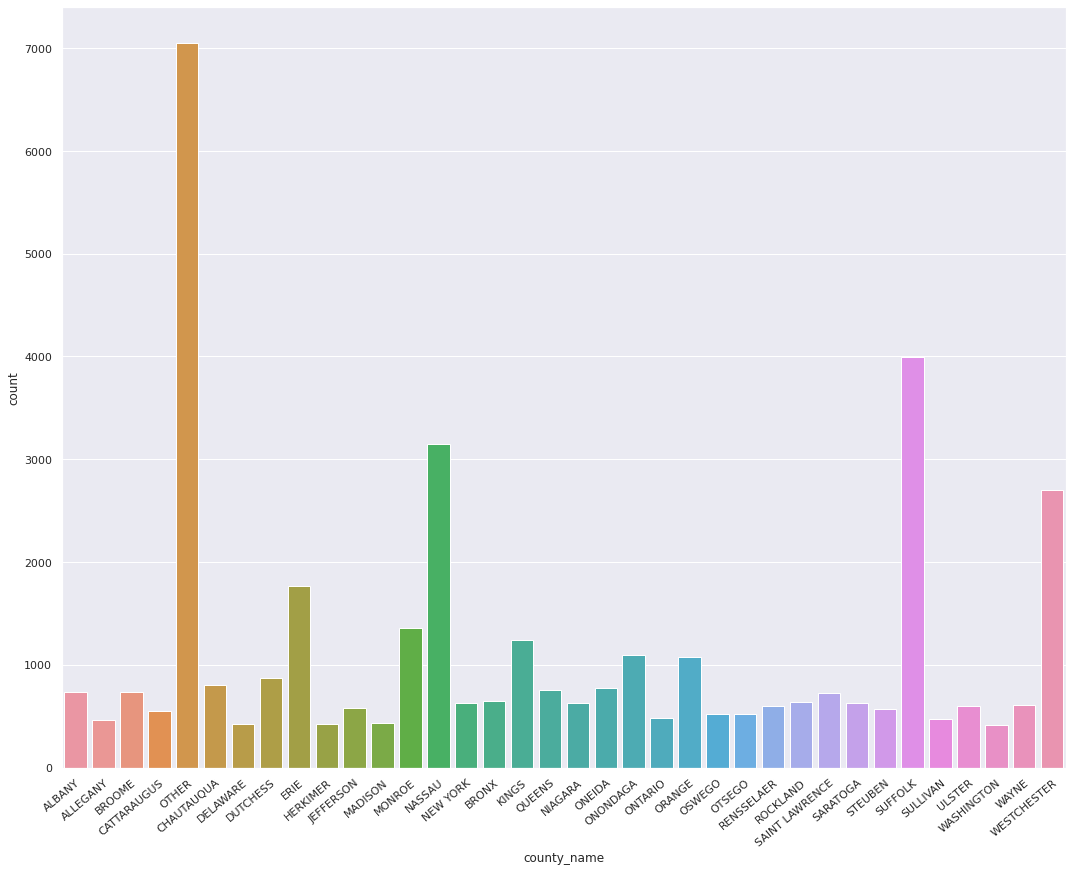

In [ ]:
#move data into object for safe mutation
county = data_prep['county_name'].copy()

#create mask to identify subgroups <x percent of data
countylist = county.value_counts(normalize=True) < .01
countylist = countylist[countylist.values].index
mask = county.isin(countylist)

#use mask to update target values
county[mask] = 'OTHER'

#visualize outcome
print(county.value_counts().shape)
sns.countplot(county);
plt.xticks(rotation=40 , rotation_mode='anchor',ha="right");

Conclusion: using our updated county array we will reduce 58 variables to 36 columns with 1 hot encoding. This is not as good as 30 we would get with hashing but without the downsides ("collisions" and reduced explainability) that we would receive for such a small reduction.

In [ ]:
#replace county name with data reduced columns
data_prep['county_name'] = county
del county
data_prep.head()

,nrc_desc,county_name,nyc_ind,membership_desc,subgroup_name,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,agg_hash_0,agg_hash_1,agg_hash_2,agg_hash_3,agg_hash_4,agg_hash_5,agg_hash_6,agg_hash_7,agg_hash_8,agg_hash_9,agg_hash_10,agg_hash_11,agg_hash_12,agg_hash_13,agg_hash_14,agg_hash_15,agg_hash_16,agg_hash_17,agg_hash_18,agg_hash_19,agg_hash_20,agg_hash_21,agg_hash_22,agg_hash_23,agg_hash_24,agg_hash_25,agg_hash_26,agg_hash_27,agg_hash_28,agg_hash_29,agg_hash_30,agg_hash_31,agg_hash_32,agg_hash_33,agg_hash_34,agg_hash_35,agg_hash_36,agg_hash_37,agg_hash_38,agg_hash_39,agg_hash_40,agg_hash_41,agg_hash_42,agg_hash_43,agg_hash_44,agg_hash_45,agg_hash_46,agg_hash_47,agg_hash_48,agg_hash_49,agg_hash_50,agg_hash_51,agg_hash_52,agg_hash_53,agg_hash_54,agg_hash_55,agg_hash_56,agg_hash_57,agg_hash_58,agg_hash_59,agg_hash_60,agg_hash_61,agg_hash_62,agg_hash_63,agg_hash_64,agg_hash_65,agg_hash_66,agg_hash_67,agg_hash_68,agg_hash_69,agg_hash_70,agg_hash_71,agg_hash_72,agg_hash_73,agg_hash_74,agg_hash_75,agg_hash_76,agg_hash_77,agg_hash_78,agg_hash_79,agg_hash_80,agg_hash_81,agg_hash_82,agg_hash_83,agg_hash_84,agg_hash_85,agg_hash_86,agg_hash_87,agg_hash_88,agg_hash_89,agg_hash_90,agg_hash_91,agg_hash_92,agg_hash_93,agg_hash_94,agg_hash_95,agg_hash_96,agg_hash_97,agg_hash_98,agg_hash_99
0,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,All Students,658.0,464.0,71.0,63.0,10.0,310.0,47.0,91.0,14.0,16.0,2.0,30.0,5.0,0.0,0.0,148.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.0,-1.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Female,324.0,246.0,76.0,30.0,9.0,169.0,52.0,47.0,15.0,2.0,1.0,11.0,3.0,0.0,0.0,65.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.0,-1.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Male,334.0,218.0,65.0,33.0,10.0,141.0,42.0,44.0,13.0,14.0,4.0,19.0,6.0,0.0,0.0,83.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.0,-1.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Black,367.0,248.0,68.0,42.0,11.0,183.0,50.0,23.0,6.0,10.0,3.0,18.0,5.0,0.0,0.0,91.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.0,-1.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Urban-Suburban High Needs,ALBANY,0,2013 Total Cohort - 6 Year Outcome,Hispanic,98.0,58.0,59.0,13.0,13.0,40.0,41.0,5.0,5.0,4.0,4.0,8.0,8.0,0.0,0.0,28.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,

##### subgroup_name 
We will combine any subgroup comprising less than 2 percent of records into a single group

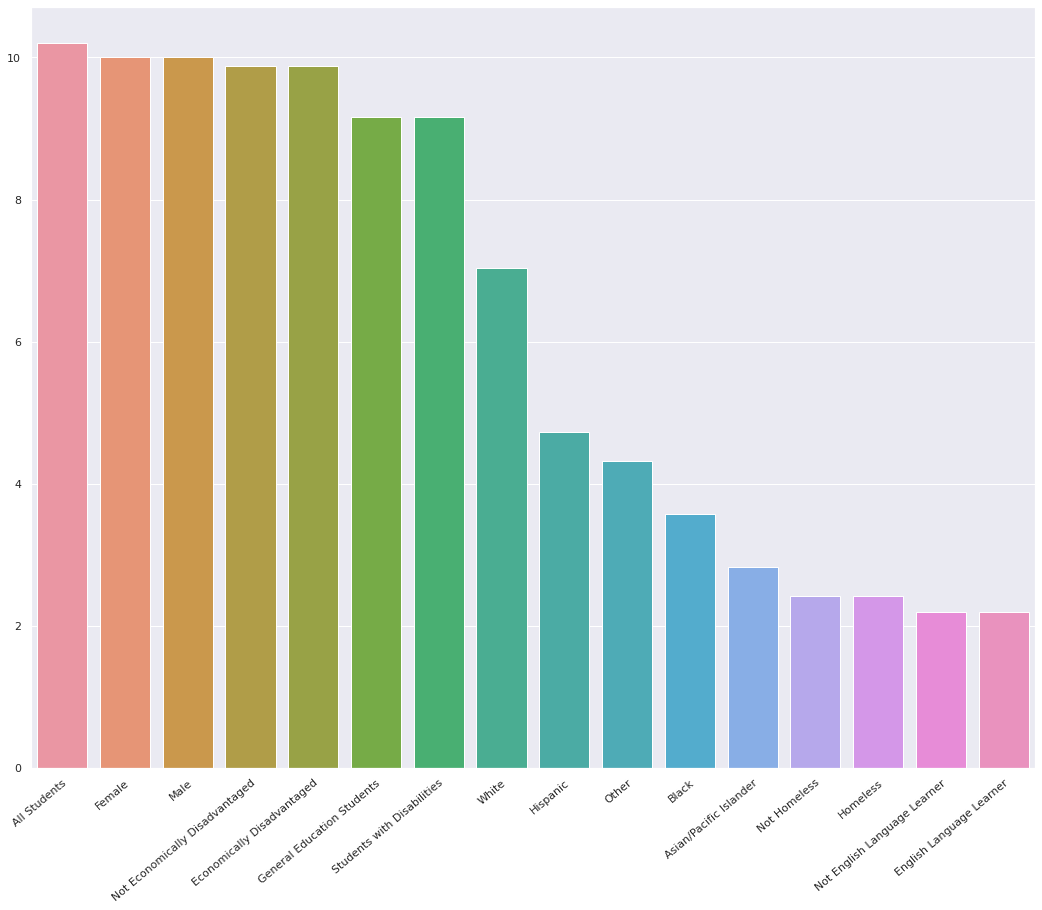

In [ ]:
#move data into object for safe mutation
subgroup_name = data_prep['subgroup_name'].copy()

#create mask to identify subgroups <x percent of data
subgroup_drops = subgroup_name.value_counts(normalize=True)<.02
subgroup_drops = subgroup_drops[subgroup_drops.values].index
mask = subgroup_name.isin(subgroup_drops)

#use mask to update target values
subgroup_name[mask]='Other'

#visualize outcome
subgroup_counts = subgroup_name.value_counts(normalize=True)
sns.barplot(subgroup_counts.index,subgroup_counts.values*100);
plt.xticks(rotation=40 , rotation_mode='anchor',ha="right");

In [ ]:
#replacing subgroup_name
data_prep['subgroup_name'] = subgroup_name
del subgroup_name
data_prep.subgroup_name.value_counts()#sanity check

All Students                      4046
Female                            3970
Male                              3970
Not Economically Disadvantaged    3918
Economically Disadvantaged        3918
General Education Students        3632
Students with Disabilities        3632
White                             2790
Hispanic                          1878
Other                             1714
Black                             1416
Asian/Pacific Islander            1122
Not Homeless                       962
Homeless                           962
Not English Language Learner       872
English Language Learner           872
Name: subgroup_name, dtype: int64

##### nrc_desc  
To even our classes we will combine the following into an "other" class.['Buffalo  Rochester  Yonkers  Syracuse ', 'NYC', 'Urban-Suburban High Needs'] 

nyc_id will continue to provide information about NYC membership so we will not lose all distinct data from the NYC area.


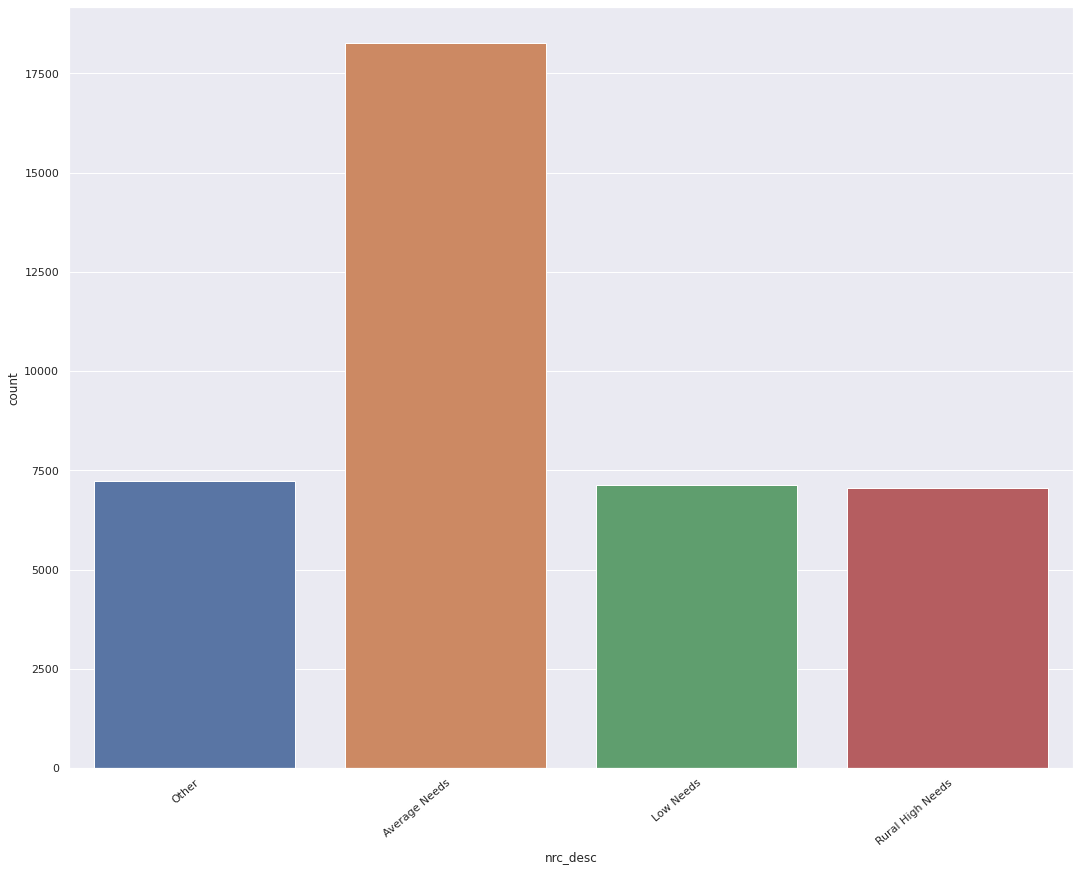

In [ ]:
#move data into object for safe mutation
nrc_desc = data_prep['nrc_desc'].copy()

#create mask to identify subgroups
nrc_desc_combine = ['Buffalo  Rochester  Yonkers  Syracuse','NYC','Urban-Suburban High Needs']

mask = nrc_desc.isin(nrc_desc_combine)

#use mask to update target values
nrc_desc[mask]='Other'

#visualize outcome
sns.countplot(nrc_desc);
plt.xticks(rotation=40 , rotation_mode='anchor',ha="right");

In [ ]:
#adding transformed nrc_desc back to data_prep
data_prep['nrc_desc'] = nrc_desc
del nrc_desc
data_prep.nrc_desc.value_counts()#sanity check

Average Needs       18260
Other                7230
Low Needs            7136
Rural High Needs     7048
Name: nrc_desc, dtype: int64


## Standardize and Normalize Quantitative Data

In [ ]:
from sklearn.preprocessing import power_transform as pt 

pct_columns = ['grad_pct','local_pct','reg_pct','reg_adv_pct','non_diploma_credential_pct','still_enr_pct','ged_pct']#removing dropout_pct

columns = cnt_columns + pct_columns
print(columns)

for column in columns:#iterate over identified columns
  a = data_prep[[column]]
  data_prep[column] = pt(a,method='yeo-johnson')#we are performing a yeo-johnson transformation because most of the features have negative or 0 values

data_prep[columns].head()#sanity check

['enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_cnt', 'reg_adv_cnt', 'non_diploma_credential_cnt', 'still_enr_cnt', 'ged_cnt', 'dropout_cnt', 'grad_pct', 'local_pct', 'reg_pct', 'reg_adv_pct', 'non_diploma_credential_pct', 'still_enr_pct', 'ged_pct']


,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt,grad_pct,local_pct,reg_pct,reg_adv_pct,non_diploma_credential_pct,still_enr_pct,ged_pct
0,1.556674,1.439241,1.795464,1.619218,0.961980,1.836021,1.554668,-0.588644,1.952577,-1.203165,0.594673,0.240588,-0.660607,1.105788,0.642314,-0.538319
1,1.117188,1.017930,1.405988,1.239676,0.573121,1.030762,1.139663,-0.588644,1.676750,-0.905171,0.499016,0.523544,-0.607039,0.653716,0.286694,-0.538319
2,1.136630,0.936731,1.459189,1.123600,0.534733,1.812644,1.383663,-0.588644,1.765441,-1.494472,0.594673,-0.046961,-0.715699,1.446245,0.769219,-0.538319
4,1.196556,1.023360,1.589608,1.290279,0.162589,1.740634,1.361486,-0.588644,1.797294,-1.357296,0.682621,0.410878,-1.162412,1.321331,0.642314,-0.538319
5,0.309499,0.028792,0.899879,0.283271,-0.646965,1.419519,0.977049,-0.588644,1.322237,-1.722803,0.839897,-0.105074,-1.239624,1.446245,0.966898,-0.538319


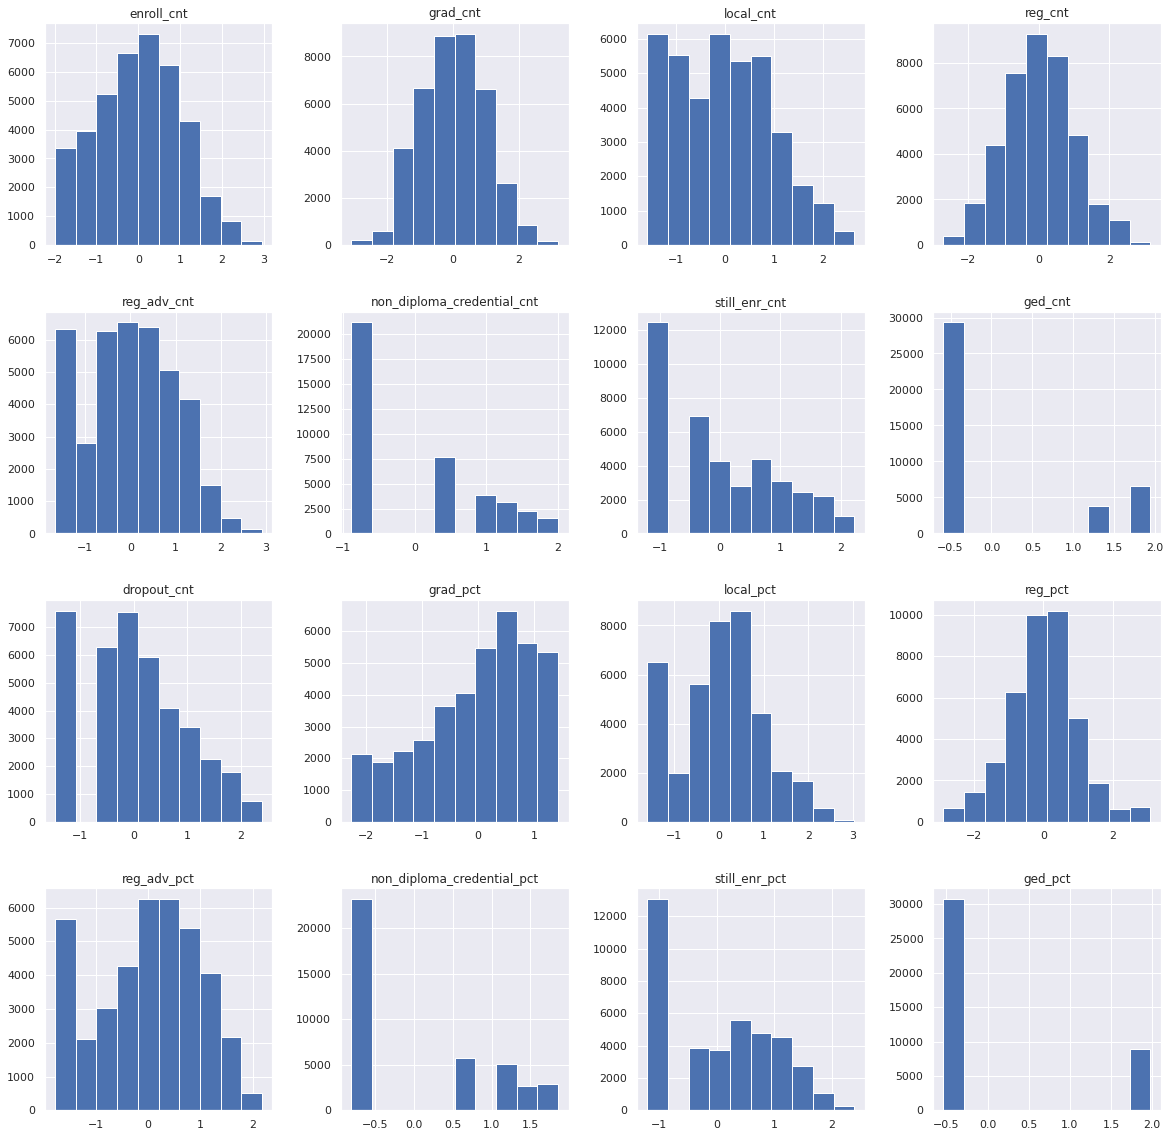

In [ ]:
# visualizing the results
data_prep[columns].hist(figsize = (20,20));

## Dummying Categorical Data


In [ ]:
#dummying county_name, membership_desc, subgroup_name, nrc_desc using the patsy library

formula = """C(subgroup_name)+ C(county_name)+C(membership_desc)+C(nrc_desc)"""
dum = dmatrix(formula, data_prep,return_type='dataframe')
dum.head()

,Intercept,C(subgroup_name)[T.Asian/Pacific Islander],C(subgroup_name)[T.Black],C(subgroup_name)[T.Economically Disadvantaged],C(subgroup_name)[T.English Language Learner],C(subgroup_name)[T.Female],C(subgroup_name)[T.General Education Students],C(subgroup_name)[T.Hispanic],C(subgroup_name)[T.Homeless],C(subgroup_name)[T.Male],C(subgroup_name)[T.Not Economically Disadvantaged],C(subgroup_name)[T.Not English Language Learner],C(subgroup_name)[T.Not Homeless],C(subgroup_name)[T.Other],C(subgroup_name)[T.Students with Disabilities],C(subgroup_name)[T.White],C(county_name)[T.ALLEGANY],C(county_name)[T.BRONX],C(county_name)[T.BROOME],C(county_name)[T.CATTARAUGUS],C(county_name)[T.CHAUTAUQUA],C(county_name)[T.DELAWARE],C(county_name)[T.DUTCHESS],C(county_name)[T.ERIE],C(county_name)[T.HERKIMER],C(county_name)[T.JEFFERSON],C(county_name)[T.KINGS],C(county_name)[T.MADISON],C(county_name)[T.MONROE],C(county_name)[T.NASSAU],C(county_name)[T.NEW YORK],C(county_name)[T.NIAGARA],C(county_name)[T.ONEIDA],C(county_name)[T.ONONDAGA],C(county_name)[T.ONTARIO],C(county_name)[T.ORANGE],C(county_name)[T.OSWEGO],C(county_name)[T.OTHER],C(county_name)[T.OTSEGO],C(county_name)[T.QUEENS],C(county_name)[T.RENSSELAER],C(county_name)[T.ROCKLAND],C(county_name)[T.SAINT LAWRENCE],C(county_name)[T.SARATOGA],C(county_name)[T.STEUBEN],C(county_name)[T.SUFFOLK],C(county_name)[T.SULLIVAN],C(county_name)[T.ULSTER],C(county_name)[T.WASHINGTON],C(county_name)[T.WAYNE],C(county_name)[T.WESTCHESTER],C(membership_desc)[T.2013 Total Cohort - 6 Year Outcome - August 2019],C(membership_desc)[T.2014 Total Cohort - 5 Year Outcome],C(membership_desc)[T.2014 Total Cohort - 5 Year Outcome - August 2019],C(membership_desc)[T.2015 Total Cohort - 4 Year Outcome],C(membership_desc)[T.2015 Total Cohort - 4 Year Outcome - August 2019],C(nrc_desc)[T.Low Needs],C(nrc_desc)[T.Other],C(nrc_desc)[T.Rural High Needs]
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Now we will replace the categorical values with the dummied data


In [ ]:
data_prep.drop(['subgroup_name','county_name','membership_desc','nrc_desc'], axis=1,inplace=True)
data_prep = pd.concat([data_prep, dum], axis=1, )
del dum
data_prep.head()

,nyc_ind,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,agg_hash_0,agg_hash_1,agg_hash_2,agg_hash_3,agg_hash_4,agg_hash_5,agg_hash_6,agg_hash_7,agg_hash_8,agg_hash_9,agg_hash_10,agg_hash_11,agg_hash_12,agg_hash_13,agg_hash_14,agg_hash_15,agg_hash_16,agg_hash_17,agg_hash_18,agg_hash_19,agg_hash_20,agg_hash_21,agg_hash_22,agg_hash_23,agg_hash_24,agg_hash_25,agg_hash_26,agg_hash_27,agg_hash_28,agg_hash_29,agg_hash_30,agg_hash_31,agg_hash_32,agg_hash_33,agg_hash_34,agg_hash_35,agg_hash_36,agg_hash_37,agg_hash_38,agg_hash_39,agg_hash_40,agg_hash_41,agg_hash_42,agg_hash_43,agg_hash_44,agg_hash_45,agg_hash_46,agg_hash_47,agg_hash_48,agg_hash_49,agg_hash_50,agg_hash_51,agg_hash_52,agg_hash_53,agg_hash_54,agg_hash_55,agg_hash_56,agg_hash_57,agg_hash_58,agg_hash_59,agg_hash_60,agg_hash_61,agg_hash_62,agg_hash_63,agg_hash_64,agg_hash_65,agg_hash_66,agg_hash_67,agg_hash_68,agg_hash_69,agg_hash_70,agg_hash_71,agg_hash_72,agg_hash_73,agg_hash_74,agg_hash_75,agg_hash_76,agg_hash_77,agg_hash_78,agg_hash_79,agg_hash_80,agg_hash_81,agg_hash_82,agg_hash_83,agg_hash_84,agg_hash_85,agg_hash_86,agg_hash_87,agg_hash_88,agg_hash_89,agg_hash_90,agg_hash_91,agg_hash_92,agg_hash_93,agg_hash_94,agg_hash_95,agg_hash_96,agg_hash_97,agg_hash_98,agg_hash_99,Intercept,C(subgroup_name)[T.Asian/Pacific Islander],C(subgroup_name)[T.Black],C(subgroup_name)[T.Economically Disadvantaged],C(subgroup_name)[T.English Language Learner],C(subgroup_name)[T.Female],C(subgroup_name)[T.General Education Students],C(subgroup_name)[T.Hispanic],C(subgroup_name)[T.Homeless],C(subgroup_name)[T.Male],C(subgroup_name)[T.Not Economically Disadvantaged],C(subgroup_name)[T.Not English Language Learner],C(subgroup_name)[T.Not Homeless],C(subgroup_name)[T.Other],C(subgroup_name)[T.Students with Disabilities],C(subgroup_name)[T.White],C(county_name)[T.ALLEGANY],C(county_name)[T.BRONX],C(county_name)[T.BROOME],C(county_name)[T.CATTARAUGUS],C(county_name)[T.CHAUTAUQUA],C(county_name)[T.DELAWARE],C(county_name)[T.DUTCHESS],C(county_name)[T.ERIE],C(county_name)[T.HERKIMER],C(county_name)[T.JEFFERSON],C(county_name)[T.KINGS],C(county_name)[T.MADISON],C(county_name)[T.MONROE],C(county_name)[T.NASSAU],C(county_name)[T.NEW YORK],C(county_name)[T.NIAGARA],C(county_name)[T.ONEIDA],C(county_name)[T.ONONDAGA],C(county_name)[T.ONTARIO],C(county_name)[T.ORANGE],C(county_name)[T.OSWEGO],C(county_name)[T.OTHER],C(county_name)[T.OTSEGO],C(county_name)[T.QUEENS],C(county_name)[T.RENSSELAER],C(county_name)[T.ROCKLAND],C(county_name)[T.SAINT LAWRENCE],C(county_name)[T.SARATOGA],C(county_name)[T.STEUBEN],C(county_name)[T.SUFFOLK],C(county_name)[T.SULLIVAN],C(county_name)[T.ULSTER],C(county_name)[T.WASHINGTON],C(county_name)[T.WAYNE],C(county_name)[T.WESTCHESTER],C(membership_desc)[T.2013 Total Cohort - 6 Year Outcome - August 2019],C(membership_desc)[T.2014 Total Cohort - 5 Year Outcome],C(membership_desc)[T.2014 Total Cohort - 5 Year Outcome - August 2019],C(membership_desc)[T.2015 Total Cohort - 4 Year Outcome],C(membership_desc)[T.2015 Total Cohort - 4 Year Outcome - August 2019],C(nrc_desc)[T.Low Needs],C(nrc_desc)[T.Other],C(nrc_desc)[T.Rural High Needs]
0,0,1.556674,1.439241,-1.203165,1.795464,0.594673,1.619218,0.240588,0.961980,-0.660607,1.836021,1.105788,1.554668,0.642314,-0.588644,-0.538319,1.952577,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.0,-1.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

We reintroduced NaN values after dropping them earlier. We will now drop them again to allow feature selection functions to work.

In [ ]:
# dropping rows where target is null
data_prep.dropna(subset=['dropout_cnt'], inplace=True)
data_prep.head()

,nyc_ind,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,agg_hash_0,agg_hash_1,agg_hash_2,agg_hash_3,agg_hash_4,agg_hash_5,agg_hash_6,agg_hash_7,agg_hash_8,agg_hash_9,agg_hash_10,agg_hash_11,agg_hash_12,agg_hash_13,agg_hash_14,agg_hash_15,agg_hash_16,agg_hash_17,agg_hash_18,agg_hash_19,agg_hash_20,agg_hash_21,agg_hash_22,agg_hash_23,agg_hash_24,agg_hash_25,agg_hash_26,agg_hash_27,agg_hash_28,agg_hash_29,agg_hash_30,agg_hash_31,agg_hash_32,agg_hash_33,agg_hash_34,agg_hash_35,agg_hash_36,agg_hash_37,agg_hash_38,agg_hash_39,agg_hash_40,agg_hash_41,agg_hash_42,agg_hash_43,agg_hash_44,agg_hash_45,agg_hash_46,agg_hash_47,agg_hash_48,agg_hash_49,agg_hash_50,agg_hash_51,agg_hash_52,agg_hash_53,agg_hash_54,agg_hash_55,agg_hash_56,agg_hash_57,agg_hash_58,agg_hash_59,agg_hash_60,agg_hash_61,agg_hash_62,agg_hash_63,agg_hash_64,agg_hash_65,agg_hash_66,agg_hash_67,agg_hash_68,agg_hash_69,agg_hash_70,agg_hash_71,agg_hash_72,agg_hash_73,agg_hash_74,agg_hash_75,agg_hash_76,agg_hash_77,agg_hash_78,agg_hash_79,agg_hash_80,agg_hash_81,agg_hash_82,agg_hash_83,agg_hash_84,agg_hash_85,agg_hash_86,agg_hash_87,agg_hash_88,agg_hash_89,agg_hash_90,agg_hash_91,agg_hash_92,agg_hash_93,agg_hash_94,agg_hash_95,agg_hash_96,agg_hash_97,agg_hash_98,agg_hash_99,Intercept,C(subgroup_name)[T.Asian/Pacific Islander],C(subgroup_name)[T.Black],C(subgroup_name)[T.Economically Disadvantaged],C(subgroup_name)[T.English Language Learner],C(subgroup_name)[T.Female],C(subgroup_name)[T.General Education Students],C(subgroup_name)[T.Hispanic],C(subgroup_name)[T.Homeless],C(subgroup_name)[T.Male],C(subgroup_name)[T.Not Economically Disadvantaged],C(subgroup_name)[T.Not English Language Learner],C(subgroup_name)[T.Not Homeless],C(subgroup_name)[T.Other],C(subgroup_name)[T.Students with Disabilities],C(subgroup_name)[T.White],C(county_name)[T.ALLEGANY],C(county_name)[T.BRONX],C(county_name)[T.BROOME],C(county_name)[T.CATTARAUGUS],C(county_name)[T.CHAUTAUQUA],C(county_name)[T.DELAWARE],C(county_name)[T.DUTCHESS],C(county_name)[T.ERIE],C(county_name)[T.HERKIMER],C(county_name)[T.JEFFERSON],C(county_name)[T.KINGS],C(county_name)[T.MADISON],C(county_name)[T.MONROE],C(county_name)[T.NASSAU],C(county_name)[T.NEW YORK],C(county_name)[T.NIAGARA],C(county_name)[T.ONEIDA],C(county_name)[T.ONONDAGA],C(county_name)[T.ONTARIO],C(county_name)[T.ORANGE],C(county_name)[T.OSWEGO],C(county_name)[T.OTHER],C(county_name)[T.OTSEGO],C(county_name)[T.QUEENS],C(county_name)[T.RENSSELAER],C(county_name)[T.ROCKLAND],C(county_name)[T.SAINT LAWRENCE],C(county_name)[T.SARATOGA],C(county_name)[T.STEUBEN],C(county_name)[T.SUFFOLK],C(county_name)[T.SULLIVAN],C(county_name)[T.ULSTER],C(county_name)[T.WASHINGTON],C(county_name)[T.WAYNE],C(county_name)[T.WESTCHESTER],C(membership_desc)[T.2013 Total Cohort - 6 Year Outcome - August 2019],C(membership_desc)[T.2014 Total Cohort - 5 Year Outcome],C(membership_desc)[T.2014 Total Cohort - 5 Year Outcome - August 2019],C(membership_desc)[T.2015 Total Cohort - 4 Year Outcome],C(membership_desc)[T.2015 Total Cohort - 4 Year Outcome - August 2019],C(nrc_desc)[T.Low Needs],C(nrc_desc)[T.Other],C(nrc_desc)[T.Rural High Needs]
0,0,1.556674,1.439241,-1.203165,1.795464,0.594673,1.619218,0.240588,0.961980,-0.660607,1.836021,1.105788,1.554668,0.642314,-0.588644,-0.538319,1.952577,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.0,-1.0,0.0,0.0,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

### dropping all zero columns
our  hash function has the ability to return all zero columns this will break our poission model. we will drop those columns now. 

In [ ]:
bad_columns = []
for c in  data_prep.columns:
    if data_prep[c].sum() == 0:
      bad_columns.append(c)
      data_prep.drop(columns=c, inplace=True)


In [ ]:
bad_columns

['agg_hash_3',
 'agg_hash_4',
 'agg_hash_5',
 'agg_hash_6',
 'agg_hash_7',
 'agg_hash_8',
 'agg_hash_11',
 'agg_hash_13',
 'agg_hash_14',
 'agg_hash_15',
 'agg_hash_16',
 'agg_hash_17',
 'agg_hash_18',
 'agg_hash_19',
 'agg_hash_20',
 'agg_hash_22',
 'agg_hash_23',
 'agg_hash_24',
 'agg_hash_25',
 'agg_hash_26',
 'agg_hash_30',
 'agg_hash_31',
 'agg_hash_33',
 'agg_hash_34',
 'agg_hash_35',
 'agg_hash_36',
 'agg_hash_37',
 'agg_hash_38',
 'agg_hash_40',
 'agg_hash_41',
 'agg_hash_43',
 'agg_hash_45',
 'agg_hash_46',
 'agg_hash_48',
 'agg_hash_50',
 'agg_hash_52',
 'agg_hash_55',
 'agg_hash_56',
 'agg_hash_59',
 'agg_hash_61',
 'agg_hash_62',
 'agg_hash_63',
 'agg_hash_64',
 'agg_hash_65',
 'agg_hash_66',
 'agg_hash_68',
 'agg_hash_69',
 'agg_hash_74',
 'agg_hash_76',
 'agg_hash_77',
 'agg_hash_78',
 'agg_hash_79',
 'agg_hash_80',
 'agg_hash_83',
 'agg_hash_84',
 'agg_hash_85',
 'agg_hash_87',
 'agg_hash_90',
 'agg_hash_91',
 'agg_hash_92',
 'agg_hash_94',
 'agg_hash_95',
 'agg_hash_96'

# Feature Selection

## Approach 1

### PCA
Principal Component Analysis replaces the original correlated features with orthogonal (uncorrelated) data. We never apply PCA (or SVD to categorical data, only qualitative data.

We will first Apply PCA to our prepared data using the following steps;

1. Separate features and response variables
  * Assignee only quantitative values to X
  * Isolate shares column in y
4. Split data to test and train groups
5. Initialized PCA model
6. Train PCA model
7. Visualize output

In [ ]:
quantitative_columns = ['enroll_cnt','grad_cnt','local_cnt','reg_cnt','reg_pct','non_diploma_credential_cnt',
                        'still_enr_cnt','ged_cnt','grad_pct','local_pct','reg_adv_cnt','reg_adv_pct',
                        'non_diploma_credential_pct','still_enr_pct','ged_pct']
categorical_columns = ['nyc_ind','agg_hash_0', 'agg_hash_1','agg_hash_2', 'agg_hash_9',	  'agg_hash_10',	'agg_hash_12', 'agg_hash_21',
                       'agg_hash_27',	'agg_hash_28',	'agg_hash_29',  'agg_hash_32',	'agg_hash_39',	'agg_hash_42',	'agg_hash_44',	'agg_hash_47',	
                       'agg_hash_49',	'agg_hash_51',	'agg_hash_53',  'agg_hash_54',	'agg_hash_57',	'agg_hash_58',	'agg_hash_60',	'agg_hash_67',	
                       'agg_hash_70',	'agg_hash_71',	'agg_hash_72',	'agg_hash_73',	'agg_hash_75',	'agg_hash_81',	'agg_hash_82', 'agg_hash_86',	'agg_hash_88',	'agg_hash_89',	
                       'agg_hash_93',	'Intercept',
                       'C(subgroup_name)[T.Asian/Pacific Islander]',	'C(subgroup_name)[T.Black]',	'C(subgroup_name)[T.Economically Disadvantaged]',	
                       'C(subgroup_name)[T.English Language Learner]',	'C(subgroup_name)[T.Female]',	'C(subgroup_name)[T.General Education Students]',	
                       'C(subgroup_name)[T.Hispanic]',	'C(subgroup_name)[T.Homeless]',	'C(subgroup_name)[T.Male]',	'C(subgroup_name)[T.Not Economically Disadvantaged]',
                       'C(subgroup_name)[T.Not English Language Learner]',	'C(subgroup_name)[T.Not Homeless]',	'C(subgroup_name)[T.Other]',
                       'C(subgroup_name)[T.Students with Disabilities]',	'C(subgroup_name)[T.White]','C(county_name)[T.ALLEGANY]','C(county_name)[T.BRONX]',
                       'C(county_name)[T.BROOME]','C(county_name)[T.CATTARAUGUS]','C(county_name)[T.CHAUTAUQUA]','C(county_name)[T.DELAWARE]',
                       'C(county_name)[T.DUTCHESS]','C(county_name)[T.ERIE]','C(county_name)[T.HERKIMER]','C(county_name)[T.JEFFERSON]',
                       'C(county_name)[T.KINGS]','C(county_name)[T.MADISON]','C(county_name)[T.MONROE]','C(county_name)[T.NASSAU]',
                       'C(county_name)[T.NEW YORK]','C(county_name)[T.NIAGARA]','C(county_name)[T.ONEIDA]','C(county_name)[T.ONONDAGA]',
                       'C(county_name)[T.ONTARIO]','C(county_name)[T.ORANGE]','C(county_name)[T.OSWEGO]','C(county_name)[T.OTHER]',
                       'C(county_name)[T.OTSEGO]','C(county_name)[T.QUEENS]','C(county_name)[T.RENSSELAER]','C(county_name)[T.ROCKLAND]',
                       'C(county_name)[T.SAINT LAWRENCE]','C(county_name)[T.SARATOGA]','C(county_name)[T.STEUBEN]','C(county_name)[T.SUFFOLK]',
                       'C(county_name)[T.SULLIVAN]','C(county_name)[T.ULSTER]','C(county_name)[T.WASHINGTON]','C(county_name)[T.WAYNE]',
                       'C(county_name)[T.WESTCHESTER]','C(membership_desc)[T.2013 Total Cohort - 6 Year Outcome - August 2019]',
                       'C(membership_desc)[T.2014 Total Cohort - 5 Year Outcome]','C(membership_desc)[T.2014 Total Cohort - 5 Year Outcome - August 2019]',
                       'C(membership_desc)[T.2015 Total Cohort - 4 Year Outcome]','C(membership_desc)[T.2015 Total Cohort - 4 Year Outcome - August 2019]',
                       'C(nrc_desc)[T.Low Needs]','C(nrc_desc)[T.Other]','C(nrc_desc)[T.Rural High Needs]'
                       ]

In [ ]:
# assign the explanatory variables to a Python object
X1 = data_prep.drop(['dropout_cnt'], axis = 1)[quantitative_columns].values
# assign the response variable to a Python object
y1 = data_prep.dropout_cnt.values

# 2. split the data into training + testing subsets
X1_train, X1_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# 3. create an instance of a PCA model +
# set the number of components must be between 0 and min(n_samples, n_features)=16 with svd_solver='full'
pca = PCA(n_components=15)

# 4. apply the PCA function to the training data
pca_data =  pca.fit_transform(X1_train)

# display the explained variance ratio for the principal components we've derived from the data
print(pca.explained_variance_ratio_)

[3.67345681e-01 2.29059001e-01 1.01297554e-01 9.69570825e-02
 8.98755803e-02 6.52364456e-02 2.21141335e-02 8.95887302e-03
 6.80522088e-03 4.33451859e-03 3.10079765e-03 2.36014685e-03
 1.86318871e-03 4.20508793e-04 2.71267934e-04]


#### Scree Plot

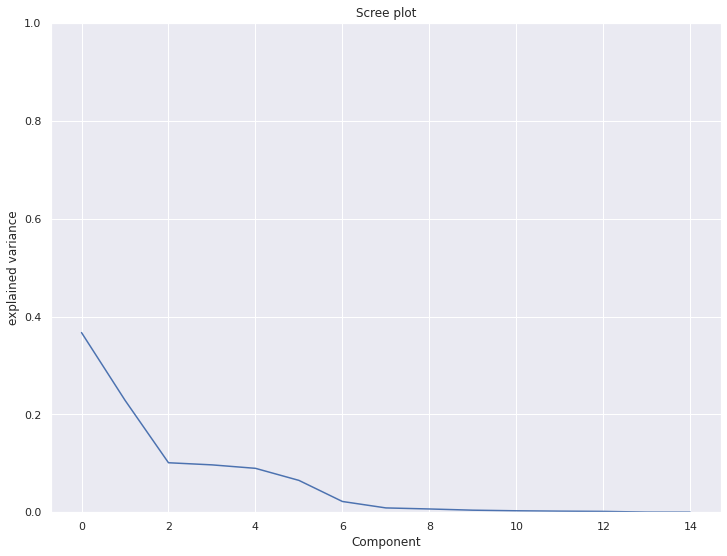

In [ ]:
# Visualizing PCA output
f, ax = plt.subplots(figsize=(12,9));
ax.plot(pca.explained_variance_ratio_)
ax.set(
    xlabel = "Component",
    ylabel = "explained variance",
    title = "Scree plot",
    ylim = (0,1)
);

It seems our first 2 principal components explains 90% of the variance in the quantitative features. We will go forward with only these values

#### PCA Heatmap

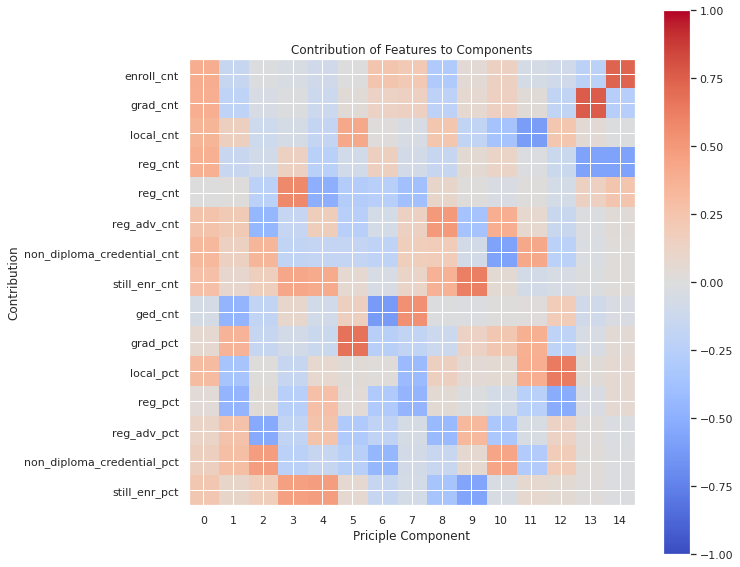

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(
    pca.components_.T,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    )
plt.xlabel("Priciple Component")
plt.ylabel("Contribution")
plt.title("Contribution of Features to Components")
plt.yticks(range(15),('enroll_cnt','grad_cnt','local_cnt','reg_cnt','reg_cnt','reg_adv_cnt','non_diploma_credential_cnt',
                        'still_enr_cnt','ged_cnt','grad_pct','local_pct','reg_pct','reg_adv_pct',
                        'non_diploma_credential_pct','still_enr_pct','ged_pct'));
plt.xticks(range(15),range(0,15));
plt.colorbar();

As expected, the cnt variables are much better at explaining the variability in the target (which is expressed in count) than the percent features.
### Building a new data frame with PCA values

We will now build a new dataframe with our PCA component and categorical values.

1. Split categorical data
  * using the same seed split should be consistent to previous split
2. Transform our testing numerical data using the already substantiated PCA model
3. Add PCA columns to dataframes
4. Training
5. Testing

In [ ]:
#test train split of categorical data 
X1_train, X1_c_test = train_test_split(data_prep[categorical_columns], test_size=0.2, random_state=42)
#sanity check
X1_train.shape

(31739, 94)

In [ ]:
# adding our PCAs to our training and testing data of Categorical values 
X1_train[['PCA0','PCA1']] = pca_data[:,0:2] #PCA0-PCA1 are selected because they explained 90% of variance

X1_c_test[['PCA0','PCA1']] = pca.transform(X1_test)[:,0:2] #testing data is transformed using PCA model built on training data and same columns are selected

X1_test = X1_c_test
#sanity check
X1_train.head()

,nyc_ind,agg_hash_0,agg_hash_1,agg_hash_2,agg_hash_9,agg_hash_10,agg_hash_12,agg_hash_21,agg_hash_27,agg_hash_28,agg_hash_29,agg_hash_32,agg_hash_39,agg_hash_42,agg_hash_44,agg_hash_47,agg_hash_49,agg_hash_51,agg_hash_53,agg_hash_54,agg_hash_57,agg_hash_58,agg_hash_60,agg_hash_67,agg_hash_70,agg_hash_71,agg_hash_72,agg_hash_73,agg_hash_75,agg_hash_81,agg_hash_82,agg_hash_86,agg_hash_88,agg_hash_89,agg_hash_93,Intercept,C(subgroup_name)[T.Asian/Pacific Islander],C(subgroup_name)[T.Black],C(subgroup_name)[T.Economically Disadvantaged],C(subgroup_name)[T.English Language Learner],C(subgroup_name)[T.Female],C(subgroup_name)[T.General Education Students],C(subgroup_name)[T.Hispanic],C(subgroup_name)[T.Homeless],C(subgroup_name)[T.Male],C(subgroup_name)[T.Not Economically Disadvantaged],C(subgroup_name)[T.Not English Language Learner],C(subgroup_name)[T.Not Homeless],C(subgroup_name)[T.Other],C(subgroup_name)[T.Students with Disabilities],C(subgroup_name)[T.White],C(county_name)[T.ALLEGANY],C(county_name)[T.BRONX],C(county_name)[T.BROOME],C(county_name)[T.CATTARAUGUS],C(county_name)[T.CHAUTAUQUA],C(county_name)[T.DELAWARE],C(county_name)[T.DUTCHESS],C(county_name)[T.ERIE],C(county_name)[T.HERKIMER],C(county_name)[T.JEFFERSON],C(county_name)[T.KINGS],C(county_name)[T.MADISON],C(county_name)[T.MONROE],C(county_name)[T.NASSAU],C(county_name)[T.NEW YORK],C(county_name)[T.NIAGARA],C(county_name)[T.ONEIDA],C(county_name)[T.ONONDAGA],C(county_name)[T.ONTARIO],C(county_name)[T.ORANGE],C(county_name)[T.OSWEGO],C(county_name)[T.OTHER],C(county_name)[T.OTSEGO],C(county_name)[T.QUEENS],C(county_name)[T.RENSSELAER],C(county_name)[T.ROCKLAND],C(county_name)[T.SAINT LAWRENCE],C(county_name)[T.SARATOGA],C(county_name)[T.STEUBEN],C(county_name)[T.SUFFOLK],C(county_name)[T.SULLIVAN],C(county_name)[T.ULSTER],C(county_name)[T.WASHINGTON],C(county_name)[T.WAYNE],C(county_name)[T.WESTCHESTER],C(membership_desc)[T.2013 Total Cohort - 6 Year Outcome - August 2019],C(membership_desc)[T.2014 Total Cohort - 5 Year Outcome],C(membership_desc)[T.2014 Total Cohort - 5 Year Outcome - August 2019],C(membership_desc)[T.2015 Total Cohort - 4 Year Outcome],C(membership_desc)[T.2015 Total Cohort - 4 Year Outcome - August 2019],C(nrc_desc)[T.Low Needs],C(nrc_desc)[T.Other],C(nrc_desc)[T.Rural High Needs],PCA0,PCA1
58538,0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,-1.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,-7.0,0.0,1.0,-2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.795787,-3.166172
33087,1,0.0,0.0,1.0,2.0,0.0,0.0,0.0,-2.0,1.0,4.0,6.0,0.0,2.0,-1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,1.0,-7.0,0.0,1.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.926469,4.216282
23317,0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,3.0,0.0,-1.0,-1.0,0.0,0.0,2.0,0.0,0.0,0.0,-1.0,-3.0,0.0,0.0,1.0,0.0,-10.0,0.0,3.0,-3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.822930,-2.394845
1748,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9.0,0.0,2.0,-3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.451665,2.091989
18193,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,1.0,3.0,0.0,0.0,0.0,0

### Backward Selection
For this section we used code from Towards Data Science to improve our model: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

In [ ]:
#create a function that will tell us which variables have a p-value less than .05.
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [ ]:
#run function and display results
backselect_variables = backward_elimination(X1_train, y_train)
backselect_variables

['nyc_ind',
 'agg_hash_1',
 'agg_hash_9',
 'agg_hash_10',
 'agg_hash_27',
 'agg_hash_32',
 'agg_hash_42',
 'agg_hash_44',
 'agg_hash_47',
 'agg_hash_51',
 'agg_hash_53',
 'agg_hash_58',
 'agg_hash_60',
 'agg_hash_72',
 'agg_hash_73',
 'agg_hash_75',
 'agg_hash_81',
 'agg_hash_82',
 'Intercept',
 'C(subgroup_name)[T.Asian/Pacific Islander]',
 'C(subgroup_name)[T.Black]',
 'C(subgroup_name)[T.Economically Disadvantaged]',
 'C(subgroup_name)[T.English Language Learner]',
 'C(subgroup_name)[T.Female]',
 'C(subgroup_name)[T.General Education Students]',
 'C(subgroup_name)[T.Hispanic]',
 'C(subgroup_name)[T.Homeless]',
 'C(subgroup_name)[T.Male]',
 'C(subgroup_name)[T.Not Economically Disadvantaged]',
 'C(subgroup_name)[T.Not English Language Learner]',
 'C(subgroup_name)[T.Not Homeless]',
 'C(subgroup_name)[T.Other]',
 'C(subgroup_name)[T.Students with Disabilities]',
 'C(subgroup_name)[T.White]',
 'C(county_name)[T.ALLEGANY]',
 'C(county_name)[T.BRONX]',
 'C(county_name)[T.BROOME]',
 'C(co

From above we see which variables we should include, so we will now create a dataframe with just those variables to create another model. 

In [ ]:
#create a new data frame with the variables that had a p-value less than 0.05
X1_train = X1_train[backselect_variables]
X1_test = X1_test[backselect_variables]

X1_train.head()

,nyc_ind,agg_hash_1,agg_hash_9,agg_hash_10,agg_hash_27,agg_hash_32,agg_hash_42,agg_hash_44,agg_hash_47,agg_hash_51,agg_hash_53,agg_hash_58,agg_hash_60,agg_hash_72,agg_hash_73,agg_hash_75,agg_hash_81,agg_hash_82,Intercept,C(subgroup_name)[T.Asian/Pacific Islander],C(subgroup_name)[T.Black],C(subgroup_name)[T.Economically Disadvantaged],C(subgroup_name)[T.English Language Learner],C(subgroup_name)[T.Female],C(subgroup_name)[T.General Education Students],C(subgroup_name)[T.Hispanic],C(subgroup_name)[T.Homeless],C(subgroup_name)[T.Male],C(subgroup_name)[T.Not Economically Disadvantaged],C(subgroup_name)[T.Not English Language Learner],C(subgroup_name)[T.Not Homeless],C(subgroup_name)[T.Other],C(subgroup_name)[T.Students with Disabilities],C(subgroup_name)[T.White],C(county_name)[T.ALLEGANY],C(county_name)[T.BRONX],C(county_name)[T.BROOME],C(county_name)[T.CATTARAUGUS],C(county_name)[T.CHAUTAUQUA],C(county_name)[T.DELAWARE],C(county_name)[T.DUTCHESS],C(county_name)[T.HERKIMER],C(county_name)[T.JEFFERSON],C(county_name)[T.MADISON],C(county_name)[T.MONROE],C(county_name)[T.NASSAU],C(county_name)[T.ONEIDA],C(county_name)[T.ONONDAGA],C(county_name)[T.ORANGE],C(county_name)[T.OSWEGO],C(county_name)[T.OTHER],C(county_name)[T.OTSEGO],C(county_name)[T.RENSSELAER],C(county_name)[T.ROCKLAND],C(county_name)[T.SAINT LAWRENCE],C(county_name)[T.SARATOGA],C(county_name)[T.STEUBEN],C(county_name)[T.SUFFOLK],C(county_name)[T.SULLIVAN],C(county_name)[T.ULSTER],C(county_name)[T.WASHINGTON],C(county_name)[T.WAYNE],C(county_name)[T.WESTCHESTER],C(membership_desc)[T.2014 Total Cohort - 5 Year Outcome],C(membership_desc)[T.2014 Total Cohort - 5 Year Outcome - August 2019],C(membership_desc)[T.2015 Total Cohort - 4 Year Outcome],C(membership_desc)[T.2015 Total Cohort - 4 Year Outcome - August 2019],C(nrc_desc)[T.Low Needs],C(nrc_desc)[T.Other],C(nrc_desc)[T.Rural High Needs],PCA0,PCA1
58538,0,0.0,0.0,2.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.795787,-3.166172
33087,1,0.0,2.0,0.0,-2.0,6.0,2.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-7.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.926469,4.216282
23317,0,1.0,0.0,0.0,0.0,4.0,3.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.822930,-2.394845
1748,0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-9.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.451665,2.091989
18193,0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-11.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.149567,-1.856163


## Approach 2

This approach will not include PCA. We will use a bi-directional selection model after looking at Correlation Thresholds, Variance Inflation Factors, and Variance Thresholds.

In [ ]:
# assign the explanatory variables to a Python object
X2 = data_prep.drop(['dropout_cnt'], axis = 1)[quantitative_columns]
# assign the response variable to a Python object
# y2 = data_prep.dropout_cnt.values already done in section 1 

# 2. split the data into training + testing subsets
X2_train, X2_test = train_test_split(X2, test_size=0.2, random_state=42)

#### Corr Threshold

In [ ]:
limit = 0.95
corr = X2_train[quantitative_columns].corr()
mask = np.triu(
    np.ones(corr.shape), k=1
).astype(bool)
corr_no_diag = corr.where(mask)
coll = [
    c
    for c in corr_no_diag.columns
    if any(abs(corr_no_diag[c]) > limit)
]
coll

['grad_cnt', 'reg_cnt']

In [ ]:
#drop reg_cnt which is accounted for with grad_cnt 
X2_train = data_prep.drop(data_prep[['grad_cnt','dropout_cnt']],axis=1)
X2_train

,nyc_ind,enroll_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,agg_hash_0,agg_hash_1,agg_hash_2,agg_hash_9,agg_hash_10,agg_hash_12,agg_hash_21,agg_hash_27,agg_hash_28,agg_hash_29,agg_hash_32,agg_hash_39,agg_hash_42,agg_hash_44,agg_hash_47,agg_hash_49,agg_hash_51,agg_hash_53,agg_hash_54,agg_hash_57,agg_hash_58,agg_hash_60,agg_hash_67,agg_hash_70,agg_hash_71,agg_hash_72,agg_hash_73,agg_hash_75,agg_hash_81,agg_hash_82,agg_hash_86,agg_hash_88,agg_hash_89,agg_hash_93,Intercept,C(subgroup_name)[T.Asian/Pacific Islander],C(subgroup_name)[T.Black],C(subgroup_name)[T.Economically Disadvantaged],C(subgroup_name)[T.English Language Learner],C(subgroup_name)[T.Female],C(subgroup_name)[T.General Education Students],C(subgroup_name)[T.Hispanic],C(subgroup_name)[T.Homeless],C(subgroup_name)[T.Male],C(subgroup_name)[T.Not Economically Disadvantaged],C(subgroup_name)[T.Not English Language Learner],C(subgroup_name)[T.Not Homeless],C(subgroup_name)[T.Other],C(subgroup_name)[T.Students with Disabilities],C(subgroup_name)[T.White],C(county_name)[T.ALLEGANY],C(county_name)[T.BRONX],C(county_name)[T.BROOME],C(county_name)[T.CATTARAUGUS],C(county_name)[T.CHAUTAUQUA],C(county_name)[T.DELAWARE],C(county_name)[T.DUTCHESS],C(county_name)[T.ERIE],C(county_name)[T.HERKIMER],C(county_name)[T.JEFFERSON],C(county_name)[T.KINGS],C(county_name)[T.MADISON],C(county_name)[T.MONROE],C(county_name)[T.NASSAU],C(county_name)[T.NEW YORK],C(county_name)[T.NIAGARA],C(county_name)[T.ONEIDA],C(county_name)[T.ONONDAGA],C(county_name)[T.ONTARIO],C(county_name)[T.ORANGE],C(county_name)[T.OSWEGO],C(county_name)[T.OTHER],C(county_name)[T.OTSEGO],C(county_name)[T.QUEENS],C(county_name)[T.RENSSELAER],C(county_name)[T.ROCKLAND],C(county_name)[T.SAINT LAWRENCE],C(county_name)[T.SARATOGA],C(county_name)[T.STEUBEN],C(county_name)[T.SUFFOLK],C(county_name)[T.SULLIVAN],C(county_name)[T.ULSTER],C(county_name)[T.WASHINGTON],C(county_name)[T.WAYNE],C(county_name)[T.WESTCHESTER],C(membership_desc)[T.2013 Total Cohort - 6 Year Outcome - August 2019],C(membership_desc)[T.2014 Total Cohort - 5 Year Outcome],C(membership_desc)[T.2014 Total Cohort - 5 Year Outcome - August 2019],C(membership_desc)[T.2015 Total Cohort - 4 Year Outcome],C(membership_desc)[T.2015 Total Cohort - 4 Year Outcome - August 2019],C(nrc_desc)[T.Low Needs],C(nrc_desc)[T.Other],C(nrc_desc)[T.Rural High Needs]
0,0,1.556674,-1.203165,1.795464,0.594673,1.619218,0.240588,0.961980,-0.660607,1.836021,1.105788,1.554668,0.642314,-0.588644,-0.538319,0.0,0.0,2.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-8.0,-1.0,1.0,-2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,1.117188,-0.905171,1.405988,0.499016,1.239676,0.523544,0.573121,-0.607039,1.030762,0.653716,1.139663,0.286694,-0.588644,-0.538319,0.0,0.0,2.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-8.0,-1.0,1.0,-2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,1.136630,-1.494472,1.459189,0.594673,1.123600,-0.046961,0.534733,-0.715699,1.812644,1.446245,1.383663,0.769219,-0.588644,-0.538319,0.0,0.0,2.0,0.0,0.0,0.0,0.0,-2.0,0.0,2.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-8.0,-1.0,1.0,-2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

#### VIF

In [ ]:
#https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X2_train[['enroll_cnt','local_cnt','reg_cnt','reg_pct','non_diploma_credential_cnt',
                        'still_enr_cnt','ged_cnt','grad_pct','local_pct','reg_adv_cnt','reg_adv_pct',
                        'non_diploma_credential_pct','still_enr_pct','ged_pct']].columns

vif_data["VIF"] = [variance_inflation_factor(X2_train[['enroll_cnt','local_cnt','reg_cnt','reg_pct','non_diploma_credential_cnt',
                                                       'still_enr_cnt','ged_cnt','grad_pct','local_pct','reg_adv_cnt','reg_adv_pct',
                                                       'non_diploma_credential_pct','still_enr_pct','ged_pct']].values, i)
                          for i in range(len(X2_train[['enroll_cnt','local_cnt','reg_cnt','reg_pct','non_diploma_credential_cnt',
                                                       'still_enr_cnt','ged_cnt','grad_pct','local_pct','reg_adv_cnt','reg_adv_pct',
                                                       'non_diploma_credential_pct','still_enr_pct','ged_pct']].columns))]



In [ ]:
print(vif_data)

                       feature         VIF
0                   enroll_cnt   94.734283
1                    local_cnt   16.498582
2                      reg_cnt  125.791491
3                      reg_pct   18.486254
4   non_diploma_credential_cnt    8.892315
5                still_enr_cnt   14.769937
6                      ged_cnt    8.042614
7                     grad_pct    5.406681
8                    local_pct    8.424950
9                  reg_adv_cnt   20.859808
10                 reg_adv_pct   14.462860
11  non_diploma_credential_pct    6.910283
12               still_enr_pct    8.854236
13                     ged_pct    6.829310


It seems they are all multicollinearity. If variables have a high VIF  it can adversely affect regression results. We will drop variables in this case that have a vif score above 20.

In [ ]:
#redefining our X  after taking into account VIF and corr thresholds
# assign the explanatory variables to a Python object
X2 = data_prep.drop(data_prep[['enroll_cnt','reg_cnt','reg_adv_cnt','grad_cnt','dropout_cnt']], axis = 1)
# assign the response variable to a Python object
#y2 = data_prep.dropout_cnt.values

# 2. split the data into training + testing subsets
X2_train, X2_test  = train_test_split(X2, test_size=0.2, random_state=42)

###  Step Forward Selection
We referenced the Towards Data Science article mentioned above for this section also. https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

In [ ]:
#https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=25,#selecting 25 to reduce number of features, but match scale of Approach 1
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

sfs.fit(X2_train, y_train)

SequentialFeatureSelector(clone_estimator=True, cv=0,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          floating=False, forward=True, k_features=25, n_jobs=1,
                          pre_dispatch='2*n_jobs', scoring='r2', verbose=0)

In [ ]:
#assign 
forwardselectvariables = sfs.k_feature_names_ 
forwardselectvariables

('grad_pct',
 'local_cnt',
 'local_pct',
 'reg_pct',
 'reg_adv_pct',
 'non_diploma_credential_pct',
 'still_enr_cnt',
 'still_enr_pct',
 'ged_cnt',
 'C(subgroup_name)[T.Black]',
 'C(subgroup_name)[T.English Language Learner]',
 'C(subgroup_name)[T.General Education Students]',
 'C(subgroup_name)[T.Homeless]',
 'C(subgroup_name)[T.Not Economically Disadvantaged]',
 'C(subgroup_name)[T.Other]',
 'C(subgroup_name)[T.Students with Disabilities]',
 'C(county_name)[T.ALLEGANY]',
 'C(county_name)[T.MONROE]',
 'C(county_name)[T.NASSAU]',
 'C(county_name)[T.OTSEGO]',
 'C(county_name)[T.SAINT LAWRENCE]',
 'C(county_name)[T.SUFFOLK]',
 'C(membership_desc)[T.2015 Total Cohort - 4 Year Outcome]',
 'C(membership_desc)[T.2015 Total Cohort - 4 Year Outcome - August 2019]',
 'C(nrc_desc)[T.Low Needs]')

In [ ]:
X2_train, X2_test  = train_test_split(data_prep[list(forwardselectvariables)], test_size=0.2, random_state=42)

X2_train.shape

(31739, 25)

In [ ]:
data_prep[list(forwardselectvariables)]

,grad_pct,local_cnt,local_pct,reg_pct,reg_adv_pct,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,C(subgroup_name)[T.Black],C(subgroup_name)[T.English Language Learner],C(subgroup_name)[T.General Education Students],C(subgroup_name)[T.Homeless],C(subgroup_name)[T.Not Economically Disadvantaged],C(subgroup_name)[T.Other],C(subgroup_name)[T.Students with Disabilities],C(county_name)[T.ALLEGANY],C(county_name)[T.MONROE],C(county_name)[T.NASSAU],C(county_name)[T.OTSEGO],C(county_name)[T.SAINT LAWRENCE],C(county_name)[T.SUFFOLK],C(membership_desc)[T.2015 Total Cohort - 4 Year Outcome],C(membership_desc)[T.2015 Total Cohort - 4 Year Outcome - August 2019],C(nrc_desc)[T.Low Needs]
0,-1.203165,1.795464,0.594673,0.240588,-0.660607,1.105788,1.554668,0.642314,-0.588644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.905171,1.405988,0.499016,0.523544,-0.607039,0.653716,1.139663,0.286694,-0.588644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.494472,1.459189,0.594673,-0.046961,-0.715699,1.446245,1.383663,0.769219,-0.588644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.357296,1.589608,0.682621,0.410878,-1.162412,1.321331,1.361486,0.642314,-0.588644,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-1.722803,0.899879,0.839897,-0.105074,-1.239624,1.446245,0.977049,0.966898,-0.588644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73138,-1.307864,-0.377276,0.147255,0.746940,-1.020751,1.321331,-0.287742,0.286694,-0.588644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73142,0.250897,-0.104297,0.147255,1.349398,-0.503956,-0.811838,-1.205229,-1.206531,-0.588644,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73143,-2.261979,-1.596883,-1.609430,-1.718063,-1.773224,1.806729,0.136176,1.379471,-0.588644,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73145,-1.256503,-1.596883,-1.609430,1.022821,-0.954938,1.682357,-1.205229,-1.206531,-0.588644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# model building

we will now move forward with model building we will take the following steps

1. build a poisson model 
2. use poisson to train alpha for binomial regraion
3. train binomial regresion
4. train linear model for comparison


## Poisson model 
Catigorical values example below were causing model to fail. we will proceed with training models souly on not categorical inputs

In [ ]:
import statsmodels.api as sm
# training model on full data input from fails no solution coudl be determined 
#issue is with categorical inputs but why could not be understood
# columns with all the same value of input were droppded
# dtype manitpulation tried 
# moving forward with subset of columns that allowed training 
poisson_training_results = sm.GLM(y_train,X1_train, family=sm.families.Poisson()).fit()
poisson_training_results.summary()


ValueError: ignored

### poision1

In [ ]:
columns = X1_test.iloc[:,[0,1,-1,-2]].columns

poison1 = sm.GLM(y_train,X1_train[columns], family=sm.families.Poisson()).fit()
poison1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                31739
Model:                            GLM   Df Residuals:                    31735
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -35383.
Date:                Mon, 25 Oct 2021   Deviance:                   1.0031e+06
Time:                        03:10:21   Pearson chi2:                 8.30e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
nyc_ind       -1.2860      0.020    -64.230      0.000      -1.325      -1.247
agg_hash_1    -1.2169      0.076    -16.081      0.000      -1.365      -1.069
PCA1           0.1311      0.003     45.085      0.000       0.125       0.137
PCA0           0.3360      0.002    152.172      0.000       0.332       0.340
==============================================================================
"""

### poison2


In [ ]:

poison2 = sm.GLM(y_train,X2_train.iloc[:,:9], family=sm.families.Poisson()).fit()
poison2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                31739
Model:                            GLM   Df Residuals:                    31730
Model Family:                 Poisson   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -35047.
Date:                Mon, 25 Oct 2021   Deviance:                   1.0032e+06
Time:                        03:10:23   Pearson chi2:                 8.44e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
grad_pct                      -0.8287      0.011    -75.039      0.000      -0.850      -0.807
local_cnt                      0.5668      0.016     36.544      0.000       0.536       0.597
local_pct                     -0.1831      0.013    -13.694      0.000      -0.209      -0.157
reg_pct                        0.1890      0.009     21.515      0.000       0.172       0.206
reg_adv_pct                    0.4689      0.013     35.173      0.000       0.443       0.495
non_diploma_credential_pct    -0.0507      0.006     -9.073      0.000      -0.062      -0.040
still_enr_cnt                  0.1301      0.020      6.605      0.000       0.092       0.169
still_enr_pct                 -0.3158      0.016    -20.170      0.000      -0.347      -0.285
ged_cnt                       -0.0655      0.005    -12.052      0.000      -0.076      -0.055
==============================================================================================
"""

Conclusions: 
While its hard to know which of data sets is actually doing better due to the issues with categorical variables we see on a sub set that allows our model buidling to continue that our X2 set performed slightly better with a lower log-likelihood.

### training alphas to use as input to negiative binomial 
we will utlize prodecure from https://dius.com.au/2017/08/03/using-statsmodels-glms-to-model-beverage-consumption/#cameron to product Alphas 

In [ ]:

import statsmodels.formula.api as smf

def ct_response(row):
    "Calculate response observation for Cameron-Trivedi dispersion test"
    y = row['target']
    m = row['Mu']
    return ((y - m)**2 - y) / m
models = [poison1, poison2]
for e, model in enumerate(models):
  ct_data =  pd.DataFrame(y_train,columns=['target'])
  ct_data['Mu'] = model.mu
  ct_data['ct_resp'] = ct_data.apply(ct_response, axis=1)
  # Linear regression of auxiliary formula
  ct_results = smf.ols('ct_resp ~ Mu - 1', ct_data).fit()
  # Construct confidence interval for alpha, the coefficient of bev_mu
  alpha_ci95 = ct_results.conf_int(0.05).loc['Mu']
  print('{} \nC-T dispersion test: alpha = {:5.3f}, 95% CI = ({:5.3f}, {:5.3f})'
        .format(e,ct_results.params[0], alpha_ci95.loc[0], alpha_ci95.loc[1]))

0 
C-T dispersion test: alpha = 0.924, 95% CI = (0.881, 0.967)
1 
C-T dispersion test: alpha = 0.765, 95% CI = (0.724, 0.807)


Based on the output our alpha for X1 will be .924 and  0.765 for X2

In [ ]:
**this continued to product errors different columns 

In [ ]:
Binomial1  = sm.GLM(y_train,X1_train.iloc[:,-2:], family=sm.families.NegativeBinomial(alpha=.924)).fit()
Binomial1.summary()


ValueError: ignored

In [ ]:
Binomial2  = sm.GLM(y_train,X2_train.iloc[:,:9], family=sm.families.NegativeBinomial(alpha=0.765)).fit()
Binomial2

ValueError: ignored

In [ ]:
 #linear model on X1 data 
 lin1 = sm.OLS(y_train,X1_train).fit()
 lin1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1150.
Date:                Mon, 25 Oct 2021   Prob (F-statistic):               0.00
Time:                        03:38:13   Log-Likelihood:                -25141.
No. Observations:               31739   AIC:                         5.042e+04
Df Residuals:                   31669   BIC:                         5.101e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================================
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
nyc_ind                                                                   -0.2653      0.014    -19.158      0.000      -0.292      -0.238
agg_hash_1                                                                 0.0755      0.015      5.080      0.000       0.046       0.105
agg_hash_9                                                                 0.0253      0.007      3.585      0.000       0.011       0.039
agg_hash_10                                                                0.0406      0.006      6.261      0.000       0.028       0.053
agg_hash_27                                                               -0.0901      0.007    -12.681      0.000      -0.104      -0.076
agg_hash_32                                                                0.0155      0.006      2.822      0.005       0.005       0.026
agg_hash_42                                                                0.0085      0.004      2.214      0.027       0.001       0.016
agg_hash_44                                                               -0.0774      0.007    -10.865      0.000      -0.091      -0.063
agg_hash_47                                                               -0.0755      0.015     -5.080      0.000      -0.105      -0.046
agg_hash_51                                                                0.1215      0.021      5.728      0.000       0.080       0.163
agg_hash_53                                                               -0.2321      0.094     -2.477      0.013      -0.416      -0.048
agg_hash_58                                                                0.0567      0.007      7.668      0.000       0.042       0.071
agg_hash_60                                                               -0.0776      0.028     -2.788      0.005      -0.132      -0.023
agg_hash_72                                                                0.1704      0.036      4.694      0.000       0.099       0.242
agg_hash_73                                                               -0.0667      0.024     -2.811      0.005      -0.113      -0.020
agg_hash_75                                                               -0.2653      0.014    -19.158      0.000      -0.292      -0.238
agg_hash_81                                                                0.0094      0.002      4.798      0.000       0.006       0.013
agg_hash_82                                                                0.0283      0.007      3.838      0.000       0.014       0.043
Intercept                                                                  0.1877      0.029      6.529      0.000       0.131       0.244
C(subgroup_name)[T.Asian/

In [ ]:
 lin2 = sm.OLS(y_train,X2_train).fit()
 lin2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.836
Model:                            OLS   Adj. R-squared (uncentered):              0.836
Method:                 Least Squares   F-statistic:                              6452.
Date:                Mon, 25 Oct 2021   Prob (F-statistic):                        0.00
Time:                        03:38:29   Log-Likelihood:                         -16384.
No. Observations:               31739   AIC:                                  3.282e+04
Df Residuals:                   31714   BIC:                                  3.303e+04
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================================================================
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
grad_pct                                                                  -0.8193      0.005   -158.635      0.000      -0.829      -0.809
local_cnt                                                                  0.7279      0.007    109.543      0.000       0.715       0.741
local_pct                                                                 -0.3054      0.005    -56.113      0.000      -0.316      -0.295
reg_pct                                                                    0.1676      0.004     40.285      0.000       0.159       0.176
reg_adv_pct                                                                0.2956      0.006     47.411      0.000       0.283       0.308
non_diploma_credential_pct                                                -0.0806      0.003    -29.541      0.000      -0.086      -0.075
still_enr_cnt                                                              0.3124      0.008     38.151      0.000       0.296       0.328
still_enr_pct                                                             -0.4509      0.007    -69.195      0.000      -0.464      -0.438
ged_cnt                                                                   -0.0443      0.003    -15.752      0.000      -0.050      -0.039
C(subgroup_name)[T.Black]                                                 -0.0496      0.012     -3.988      0.000      -0.074      -0.025
C(subgroup_name)[T.English Language Learner]                               0.2799      0.018     15.226      0.000       0.244       0.316
C(subgroup_name)[T.General Education Students]                             0.4289      0.008     51.079      0.000       0.412       0.445
C(subgroup_name)[T.Homeless]                                              -0.0711      0.016     -4.518      0.000      -0.102      -0.040
C(subgroup_name)[T.Not Economically Disadvantaged]                        -0.0125      0.008     -1.625      0.104      -0.028       0.003
C(subgroup_name)[T.Other]                                                 -0.0156      0.011     -1.360      0.174      -0.038       0.007
C(subgroup_name)[T.Students with Disabilities]                            -0.0726      0.011     -6.348      0.000      -0.095      -0.050
C(county_name)[T.ALLEGANY]                                                -0.1589      0.022     -7.387      0.000      -0.201      -0.117
C(county_name)[T.MONROE]                                                  -0.0570      0.013     -4.423      0.000      -0.082      -0.032
C(county_name)[T.NASSAU]                                         

#Conclusion

We struggled with the Poisson models and bi-nomial regressions. 

We ran into errors with the poisson equation that made us remove columns (that from our perspective) appeared random. The 2nd approach for the poisson model had a lower log-likelyhood though, and thus was prefered.

We could not get the binomial functions to run at all.

We could not figure out what the problems were in the time alloted. 

We did not have any problems running a model on our features using Linear Regression. The 2nd approach to the feature selection gave us a 10% higher R-Squared value than the 1st approach.

Thus our most prefrred model was linear regression on the 2nd approach to feature selection.